In [1]:
import geotag, ops, visualize

In [2]:
import pandas as pd
import importlib

pd.set_option('display.max_columns', None)

In [533]:
# to refresh changes to package
importlib.reload(geotag)

<module 'geotag' from '/Users/sarah/Documents/repos/block_party/analysis_tools/geotag.py'>

## Extract Locations from Key Sentences

Scope of this notebook is to explore extracting the locations from sentences that filtered as relevant to zoning at the case study areas. 

We apply a text parser to extract and normalize the areas mentioned using Open Street Map lookup dictionary. Then these areas are used in a geocoder from ArcGIS to apply the latitude and longitude as coordinates to the text input location.

The result is the ability to visualize on a map, the sentence with extracted phrase, location as a point where it is in reference to.

In [3]:
df = pd.read_pickle("../data/caseStudy_sentences.pkl")

# Geotag Text

1. From any sentence that contains a LOC tag, extract the location.
2. Create lat, long for location.

In [4]:
df.head(1)

,_id,videoURL,normalizedName,publishDate,title,meetingType,fullTranscript,lengthSeconds,wordCountFullTranscript,wordCountSummary,key_sentence,LOC_list
0,5fe7e243539a4d487dc18b65,tv-N4M_zCT4,Brooklyn Community Board 8,2020-11-06T00:00:00,Land Use Committee,"[[0.4097696840763092, Landmarks], [0.376285165...","Good at it today, let's see okay, so there see...",2:45:00,"{'building': 89, 'landmarks': 35, 'units': 31,...","{'building': 17, 'owners': 10, 'landmarks': 9,...","[Zoning district and right across the street, ...",[Pacific]


In [251]:
# create unique list of sentences if the key term was found more than once. 
df.loc[:, 'key_sentence'] = df['key_sentence'].apply(lambda x: set([i for i in x]))

In [252]:
# apply to dataframe
df.loc[:, "loc_extract_list"] = df["key_sentence"].apply(lambda x: geotag.get_location_from_text(" ".join(x)))

We see the location extraction was a lot more robust but overly so...

In [558]:
df.to_pickle('../data/odw/zoning_sentences_locations.pkl')

In [253]:
df.head()[['loc_extract_list', 'LOC_list']]

,loc_extract_list,LOC_list
0,"[Eric, Bergen, Euler, DCP, Bergen Street, Dean...",[Pacific]
1,"[Soho, Noho, Soho, New York, Soho, Noho Soho]",[Soho]
2,NaN,NaN
3,"[Latino, Autobahn, Columbia University, Adonis]",NaN
4,"[Equinox, East, Elaine, Craig, Adam, Sandy, Eq...","[Penxg, the Upper East, East]"


From here, we should develop a function that can slice and dice a dataframe by community board to surfact relevant locations that can be geotagged to a specific borough.

In [420]:
import json

# Open the JSON file
with open("/Users/sarah/Documents/data/clean.json", "r") as f:
    # Load the data from the file
    data = json.load(f)


In [409]:
!pwd

/Users/sarah/Documents/repos/block_party/workflows


In [281]:
acronym = [x.upper() for x in data.get("capital")]

TODO: look into the top zoning areas:


 'R7A': 118,
'R6B': 111,
'R6A': 83,

In [282]:
zoning = ["R7A", "R6B", "R6A"]

In [549]:
not_areas = ["New York City", "Brooklyn", "City", "Please", "Okay", "City Council",  "New York",
"Queens", "Manhattan", "District", "Department Of City", "Department", "Community", "Avenue", "Zoning",
"Mandatory Inclusionary Housing", "Department Of City Planning", "Paul", "City Planning", "FAR", "Appendix G",
 "Street", "Euler", "Committee", "Zoning Committee", "Basically",  "Development Committee", "Road", "Sorry", "Use", 
 "Areola", "Cb2", "Cb12",  "Cb1", "Use", "New York City Board", "Cb1", "Again", "Sidewalk",
  "Tonight", "Bronx CB2", "Amendment", "Bronx", "Mayor", "Homeless", "General", "Housing", "School",  "Yes"]

In [550]:
names = [ "Chris", "Jd", "Frank",  "David", "Joe", "Sarah",
 "Eric", "Jesse", "Jeffrey", "Betty", "Andrew", "Mike", "Marty", "Pete", "Leila",
 "Jim", "Tim", "Steve", "Annie", "Michelle", "Anthony", "Elaine", "Diana",  "Debbie", "Larry", "Adam", "Alex", "John"]

In [551]:
remove_value = not_areas + acronym + zoning + names

In [552]:
len(remove_value)

407

In [443]:
from pprint import pprint
from IPython.display import display, Markdown, HTML

In [454]:
HTML('<strong>{}</strong><br/>'.format("'2020 did issued a resolution calling for the city to pause and revise its plan for Soho Noho rezoning.\n'"))

In [517]:
df_ex = df.explode("key_sentence")

In [527]:
df_ex[ (df_ex['key_sentence'].str.contains("gentrification"))].key_sentence.value_counts()

There's housing in the adjacent communities and not a lot of growth is allowed and what we have seen from that dynamic is just gentrification, and that is happening without the rezoning and what this rezoning has to offer are 3,000, affordable homes, incentives to make this, you know Gowanus mix a reality and also lots of investments in the community that wouldn't be coming otherwise    1
Name: key_sentence, dtype: int64

In [509]:
test = [i for i in df[(df['key_sentence'].astype(str).str.contains('Gowanus')) & (df['key_sentence'].astype(str).str.contains('decision'))]['key_sentence']]

In [557]:
5 + 6

11

In [556]:
[i for i in df[(df['key_sentence'].astype(str).str.contains('Europe')) & (df['key_sentence'].astype(str).str.contains('zoning'))]['key_sentence']]

[{"As of read, zoning may not be preferable, but their possibility I mean that's.",
  'As the secretary of the Chinatown working group community planning group created in 2008, our community Jon zoning plan would limit buildings in the core of Chinatown to 85.',
  'Even if the city dispose propping properties without changing the zoning, they still have to go through the EULA process.',
  'Five of them is asking to create more new space with current zoning and also want to see the current tenants to be able to move back to the future building and also once the future building to be remained for exclusively for nonprofit use and also, they hope, the key architectural elements and could be honored and also incorporated into the new design.',
  'I advocate for restoring the historical structural facade, as others have said, in whole or in part, and the significant structural architectural elements of the building the city has to have the will and the imagination to create something specia

In [511]:
[(HTML(f'<strong><font size="18">{print(i)}</strong></font><br/>') )for i in test[2]]

Correct is the filing of the official map going to be reviewed in advance of the certification of the overall Euler rezoning sure, thank you and I'm sorry having to go back and forth on that.
At the same time, we have a model for zoning and a model for the unified stormwater rule and, at the end of the day, they're just that they're models and as the zoning gets built out and the unified storm water rule goes into effect.
The zoning proposal will include a special district.
They don't have jurisdiction over that they're regulating the combined sewers because of the petroleum hydrocarbons that adhere to some of the organic matter, and we have, under the record of decision a requirement to reduce those part particles if you will, by a range of 59 to 74 percent, and we are exceeding that range with the tanks and then exceeding that even further with the rezoning properties turning over I hope that answers your question.

We chose the fourth avenue because it's a higher density district, t

[<IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 <IPython.core.display.HTML object>,
 

Removing...
New York City
Removing...
Brooklyn
Removing...
City
Removing...
Please
Removing...
Okay
Removing...
City Council
Removing...
New York
Removing...
Queens
Removing...
Manhattan
Removing...
District
Removing...
Department Of City
Removing...
Department
Removing...
Community
Removing...
Avenue
Removing...
Zoning
Removing...
Mandatory Inclusionary Housing
Removing...
Department Of City Planning
Removing...
Paul
Removing...
City Planning
Removing...
Street
Removing...
Euler
Removing...
Committee
Removing...
Sorry
Removing...
Bronx
Removing...
General
Removing...
Housing
Removing...
Yes
Removing...
RFPS
Removing...
ESD
Removing...
ULURP
Removing...
DC
Removing...
HVAC
Removing...
NYPD
Removing...
DOB
Removing...
DOT
Removing...
DCA
Removing...
RFP
Removing...
HPD
Removing...
AMI
Removing...
BSA
Removing...
ADA
Removing...
LPC
Removing...
CUNY
Removing...
DEP
Removing...
MTA
Removing...
DCP
Removing...
CB2
Removing...
CB8
Removing...
MIH
Removing...
FDNY
Removing...
NIH
Removing...

/Users/sarah/Documents/repos/block_party/analysis_tools/visualize.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (10,5))


Removing...
New York City
Removing...
Brooklyn
Removing...
City
Removing...
Okay
Removing...
City Council
Removing...
New York
Removing...
Manhattan
Removing...
District
Removing...
Department
Removing...
Community
Removing...
Zoning
Removing...
Mandatory Inclusionary Housing
Removing...
Department Of City Planning
Removing...
Paul
Removing...
City Planning
Removing...
Street
Removing...
Basically
Removing...
Sorry
Removing...
Use
Removing...
Cb1
Removing...
Again
Removing...
Bronx
Removing...
DCWP
Removing...
CFO
Removing...
ULURP
Removing...
CB
Removing...
NYC
Removing...
DOB
Removing...
DOT
Removing...
RFP
Removing...
WPA
Removing...
HPD
Removing...
AMI
Removing...
OMB
Removing...
BSA
Removing...
ADA
Removing...
LPC
Removing...
DEP
Removing...
MTA
Removing...
BQE
Removing...
SLA
Removing...
DCP
Removing...
CB1
Removing...
CB6
Removing...
DEC
Removing...
MIH
Removing...
FDR
Removing...
FDNY
Removing...
CPC
Removing...
LNG
Removing...
YMCA
Removing...
R7A
Removing...
R6B
Removing...
F

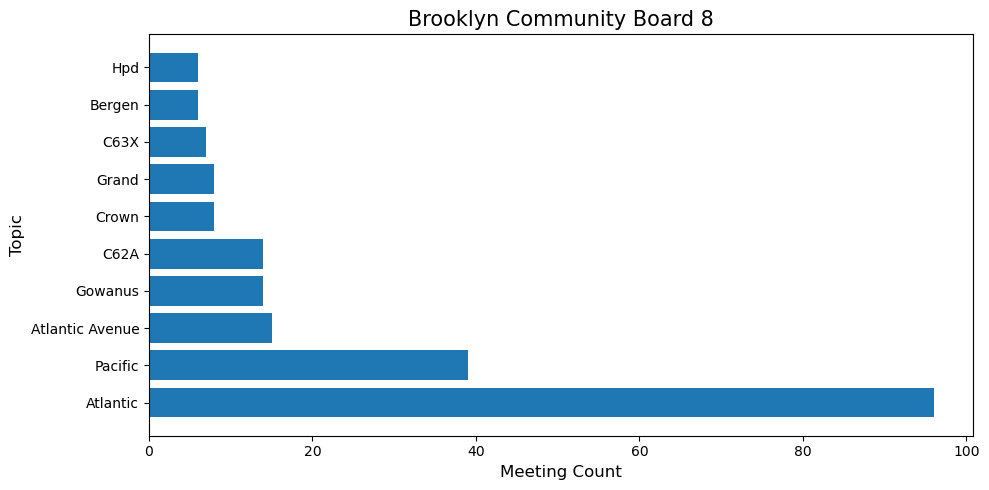

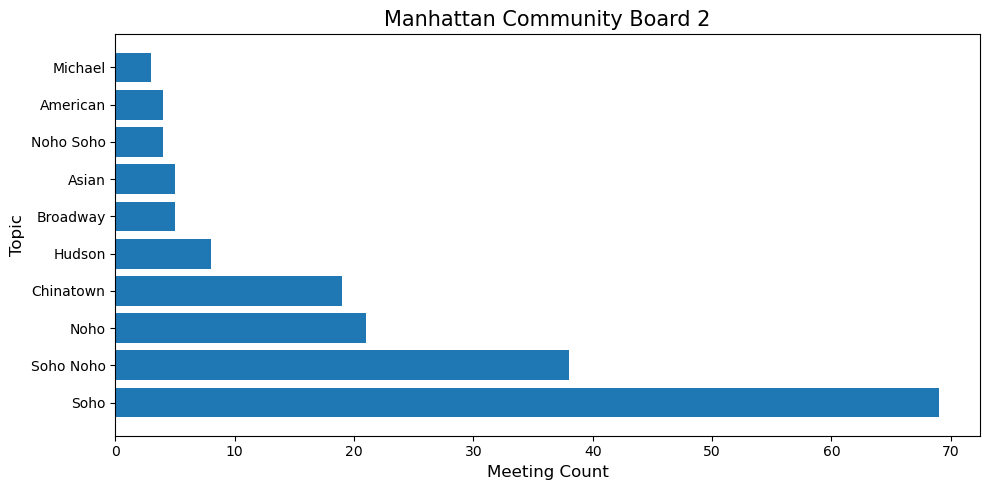

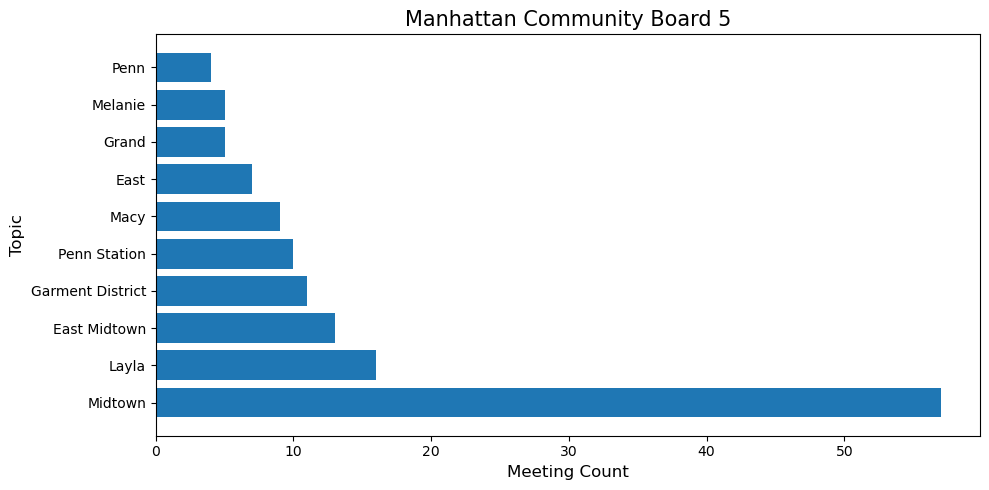

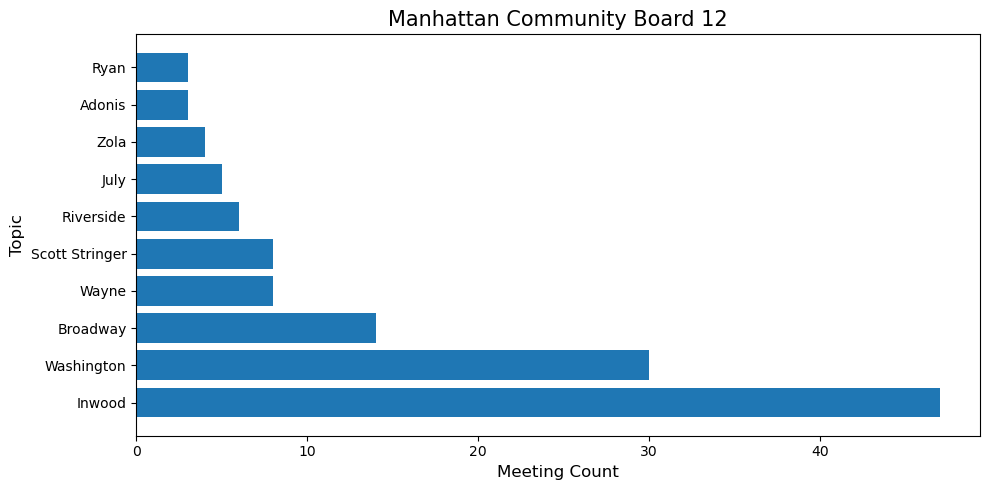

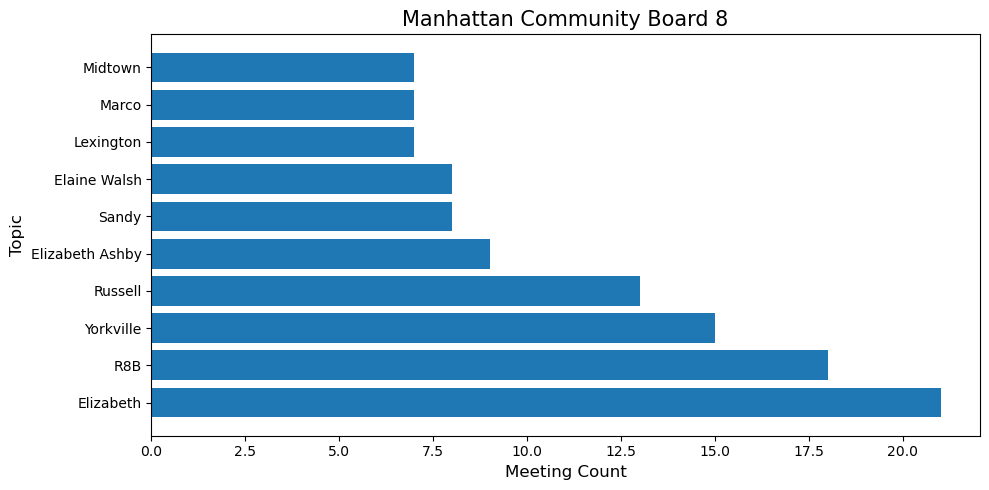

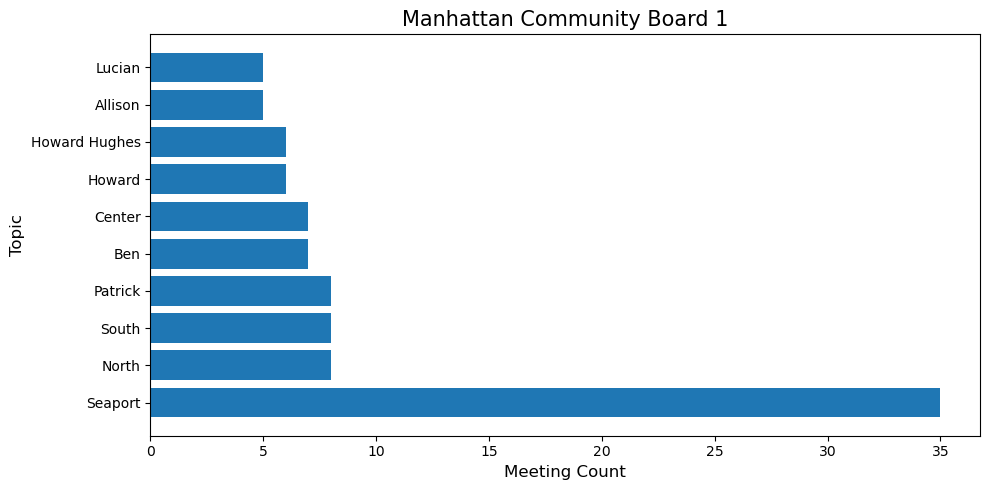

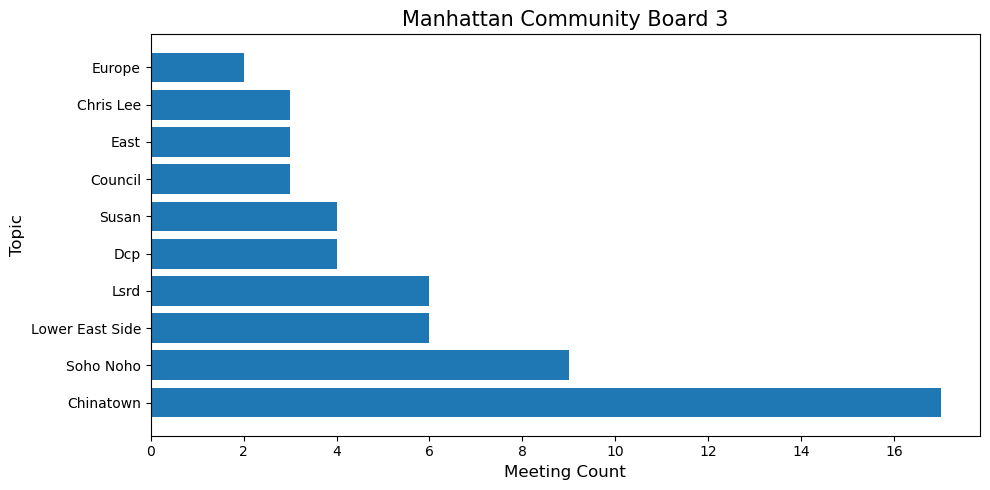

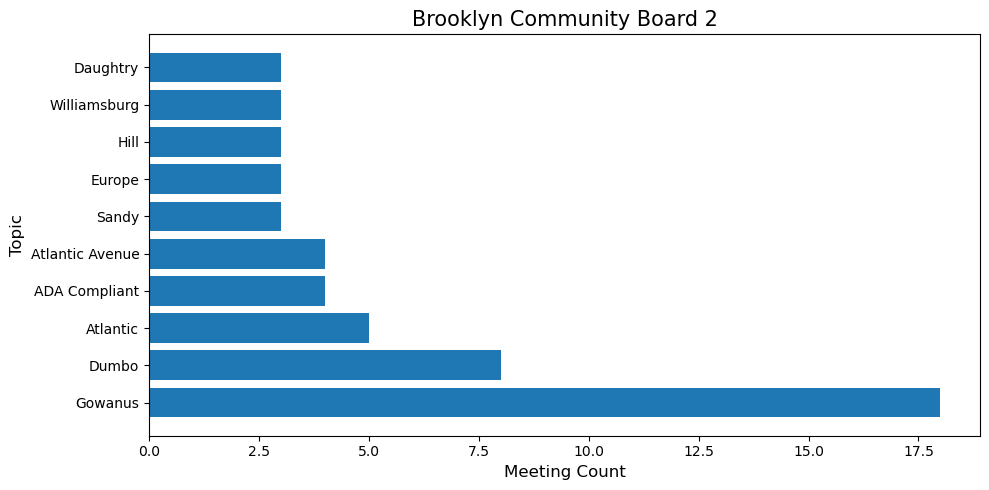

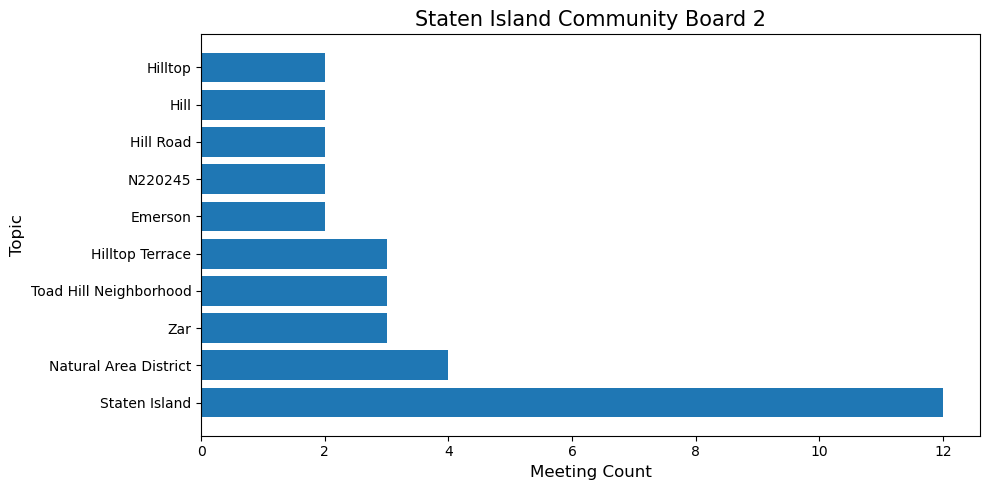

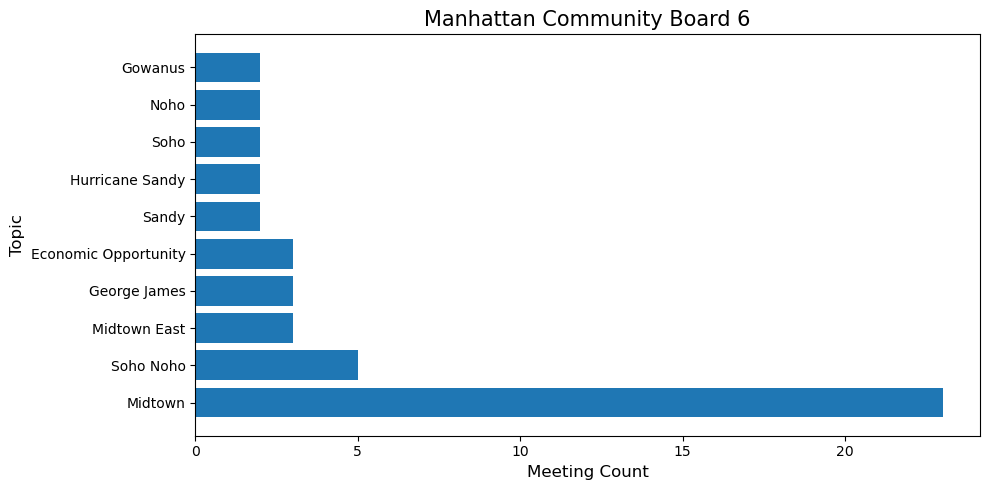

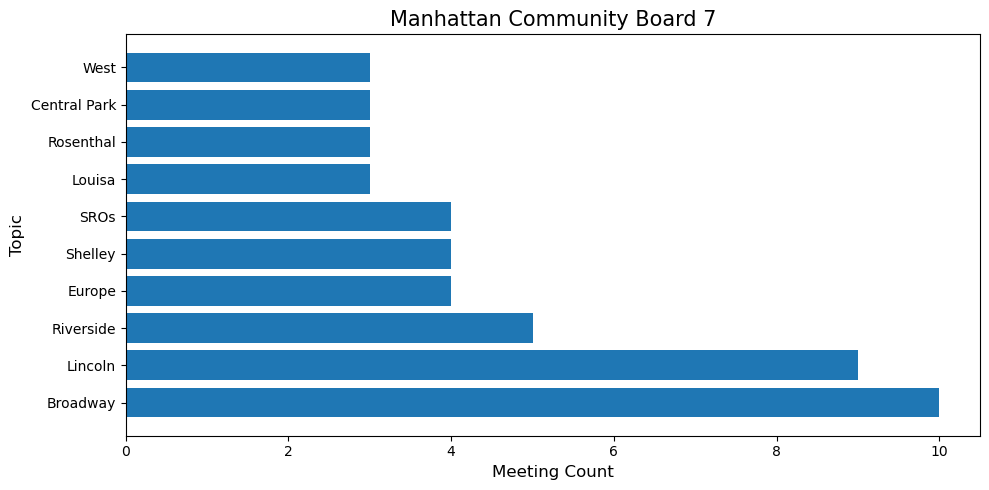

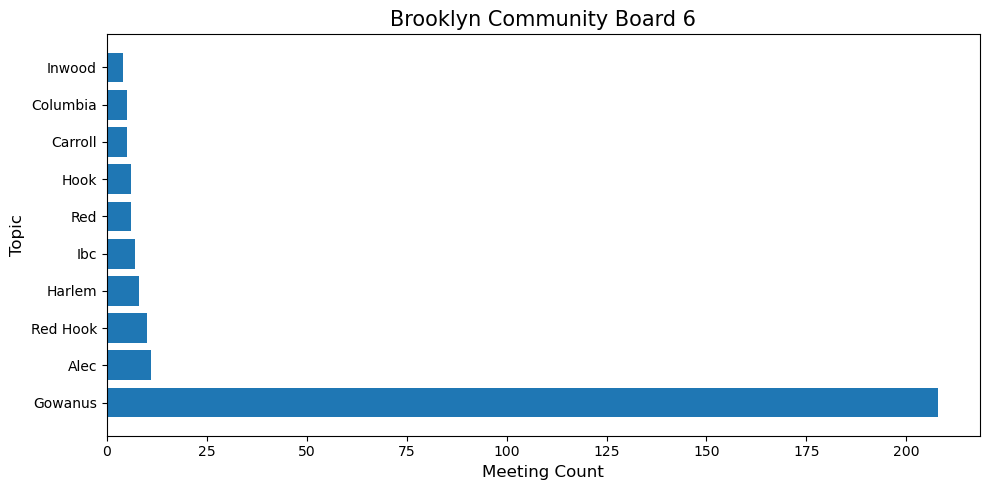

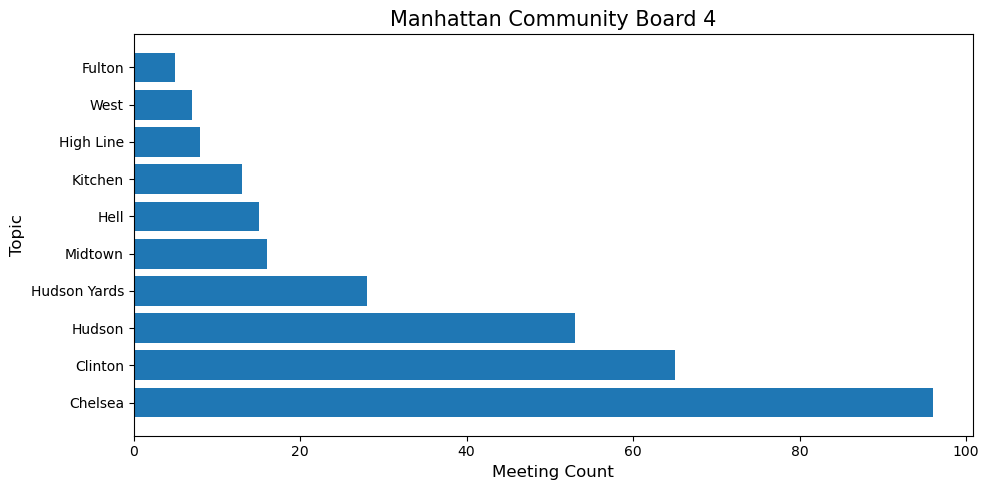

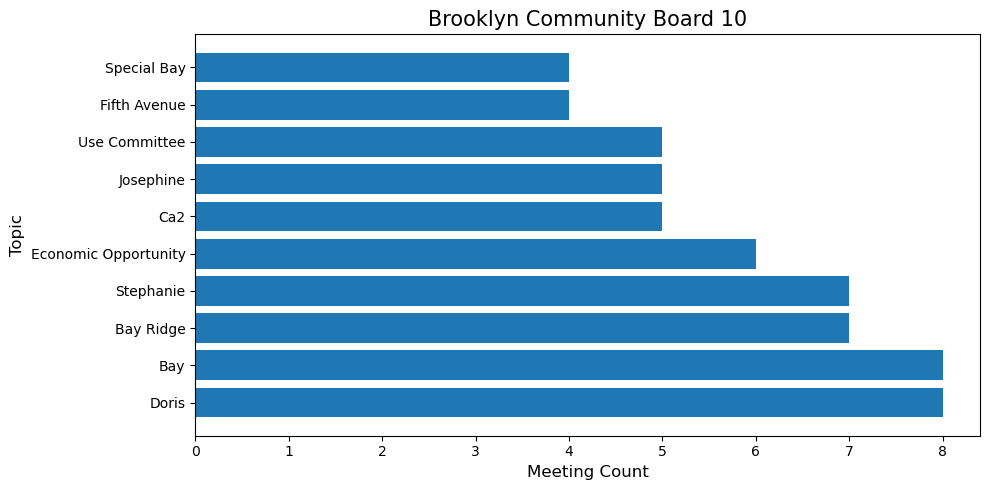

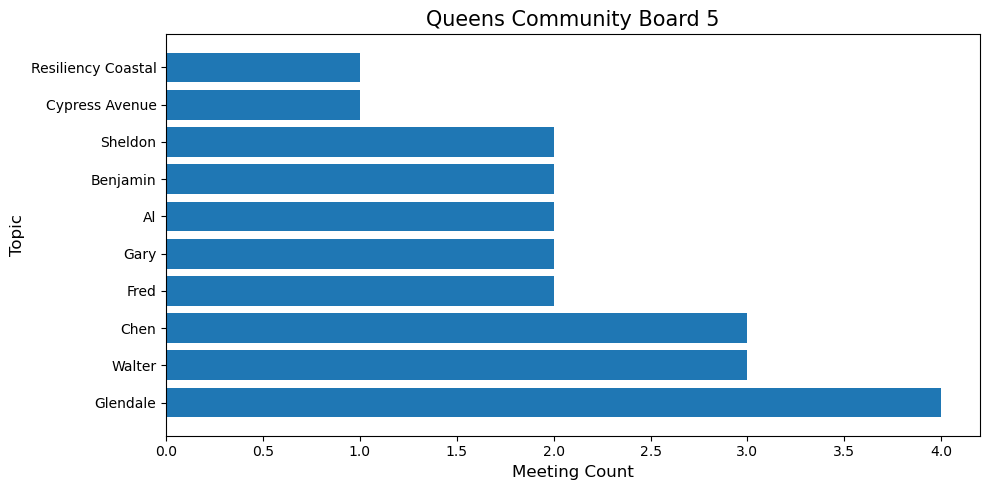

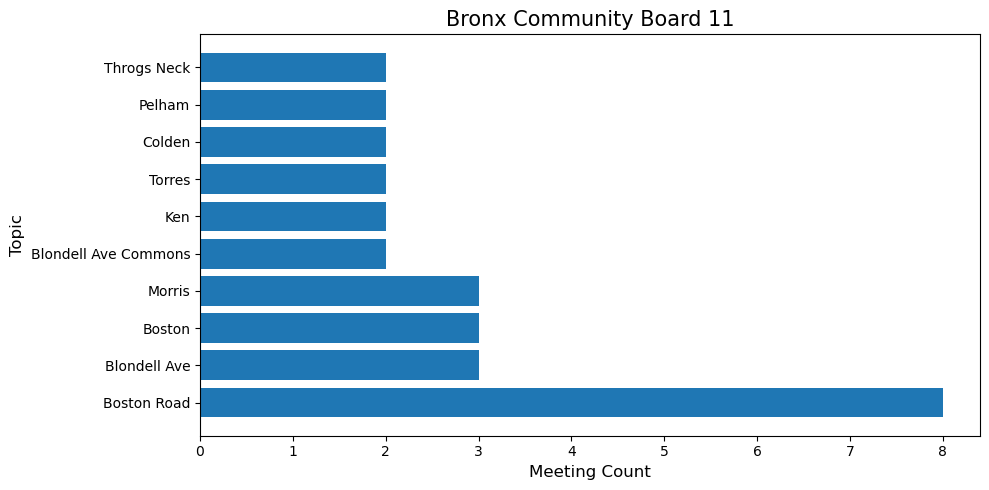

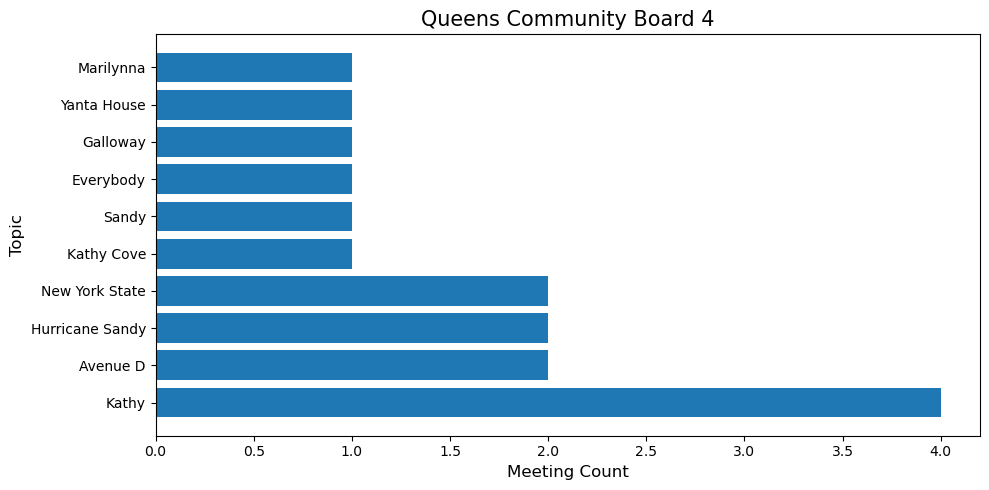

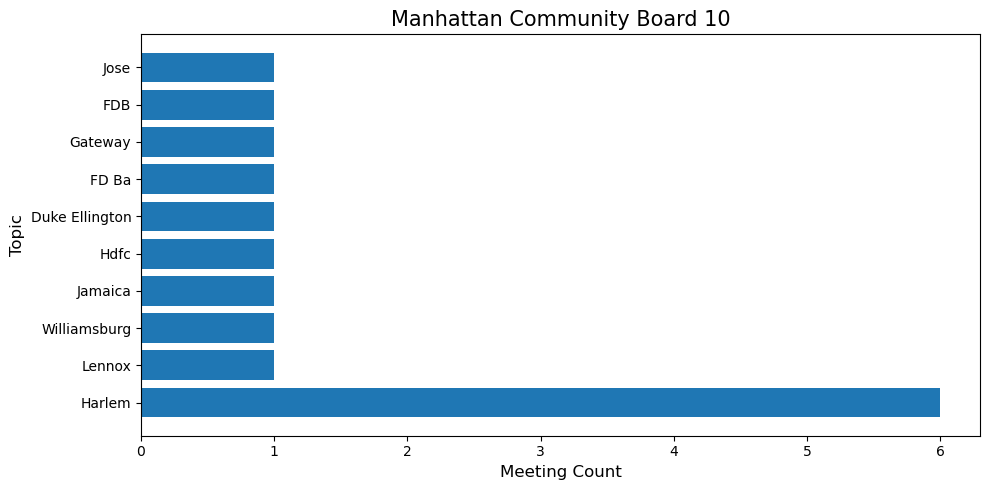

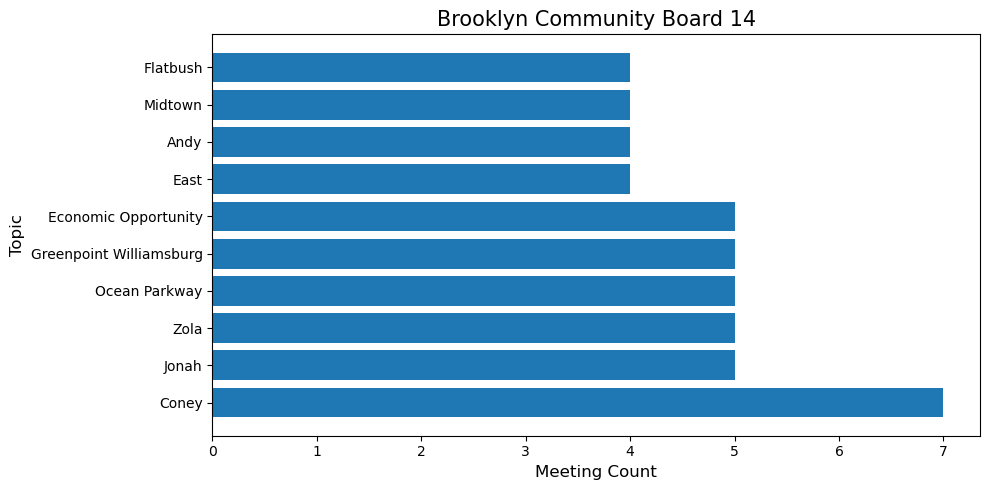

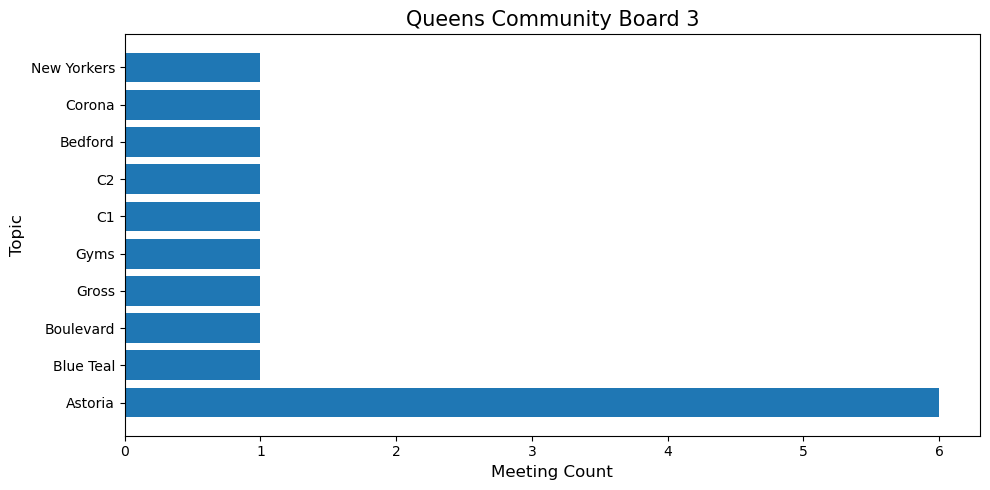

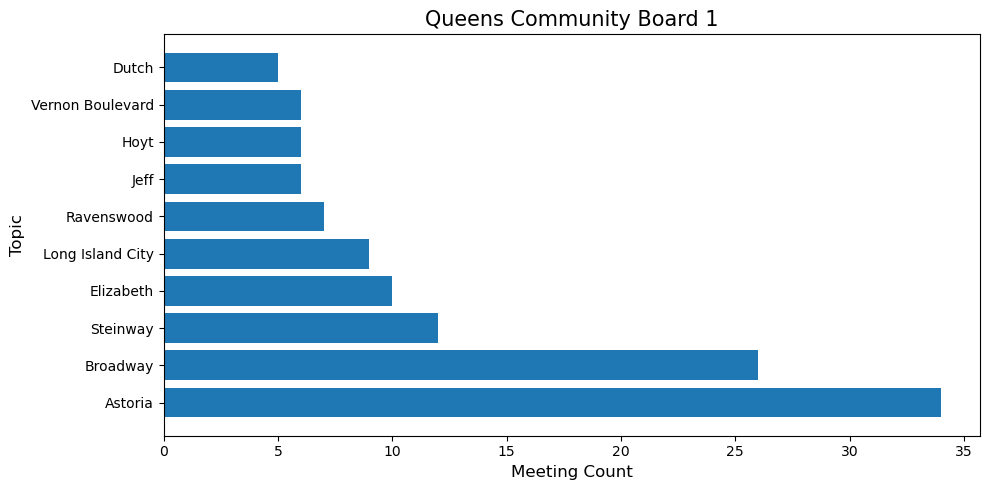

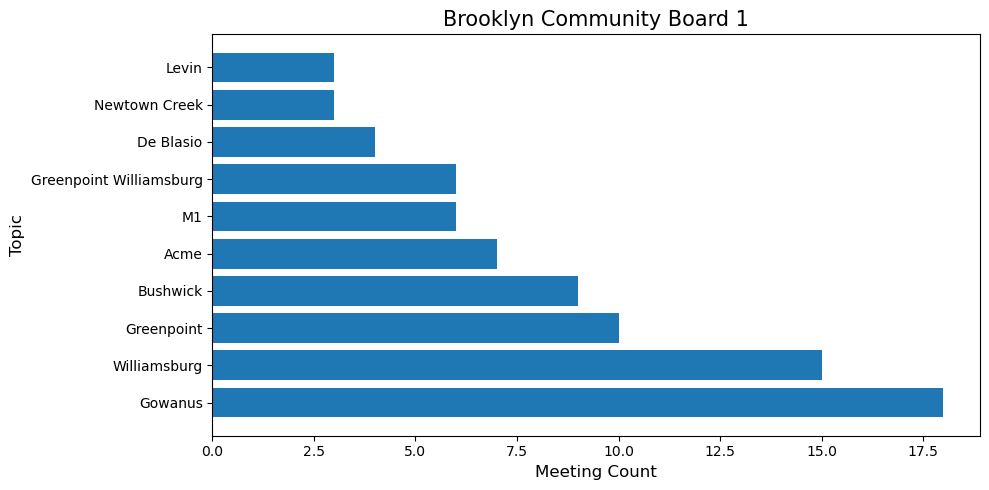

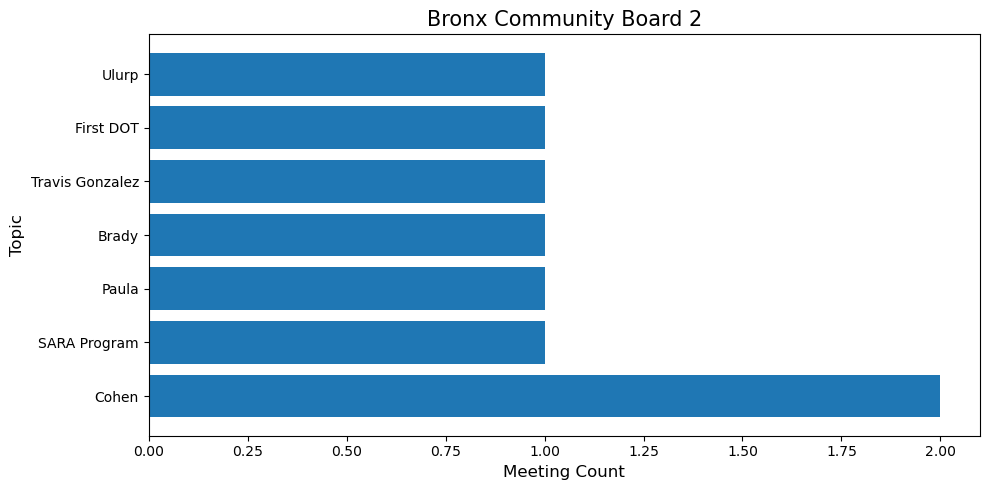

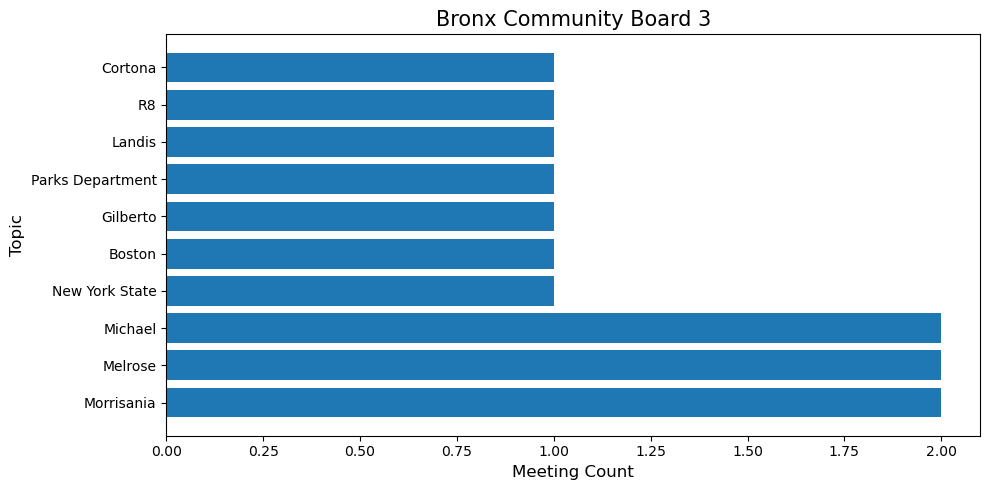

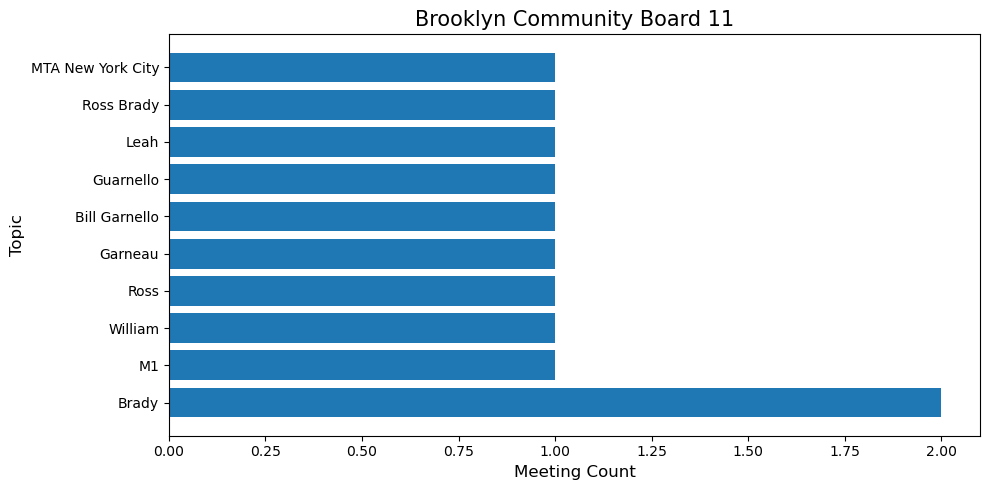

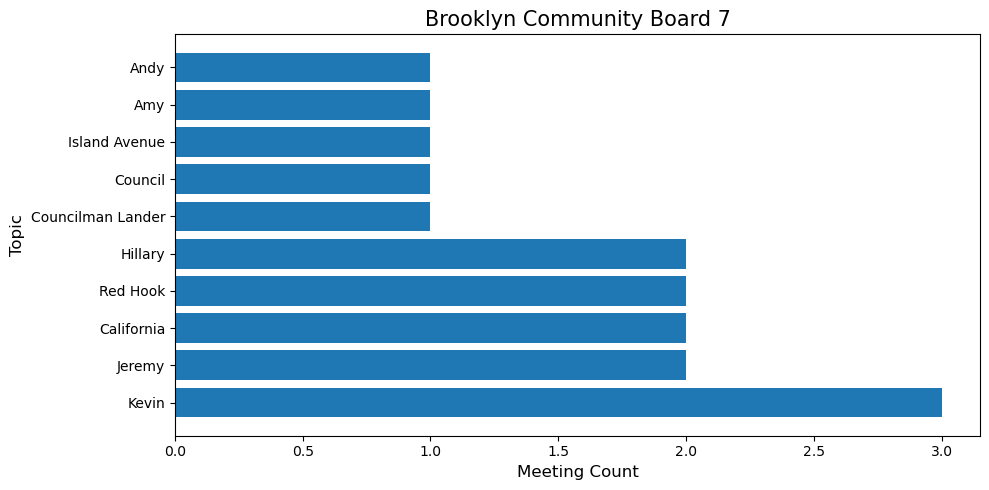

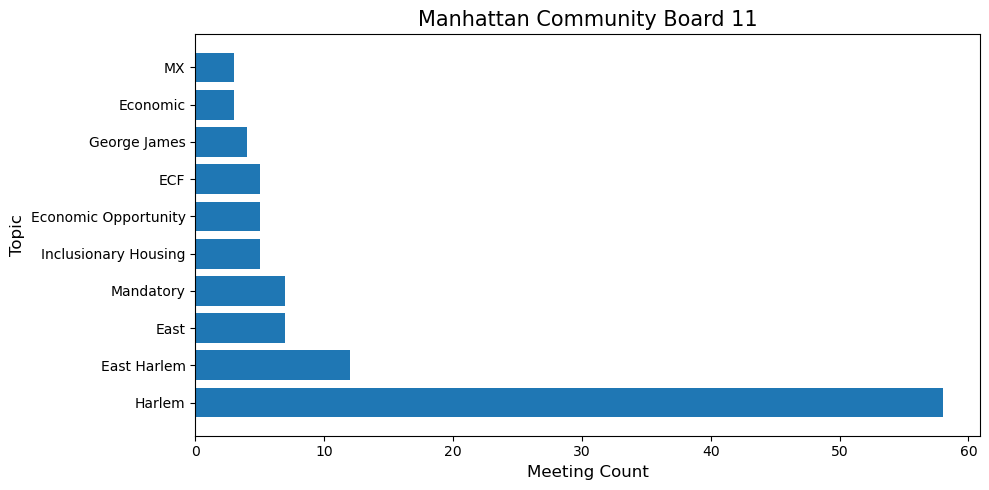

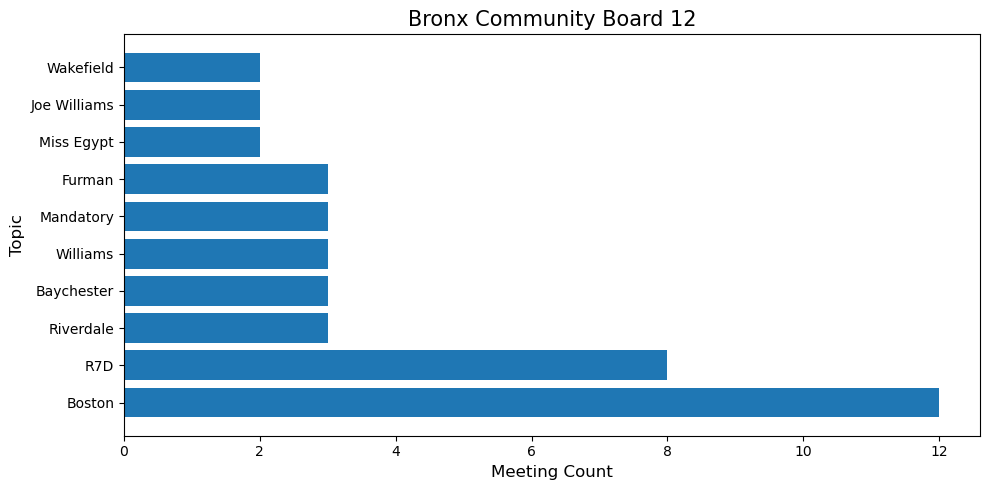

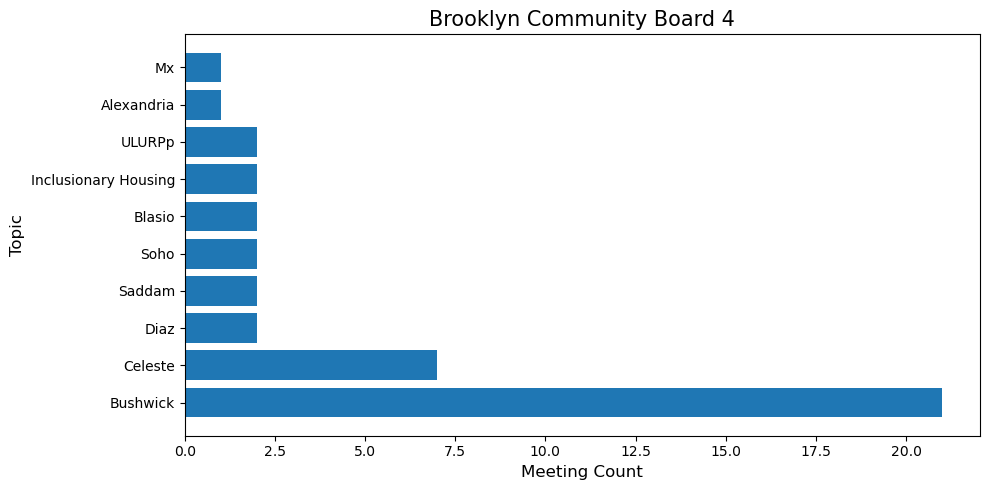

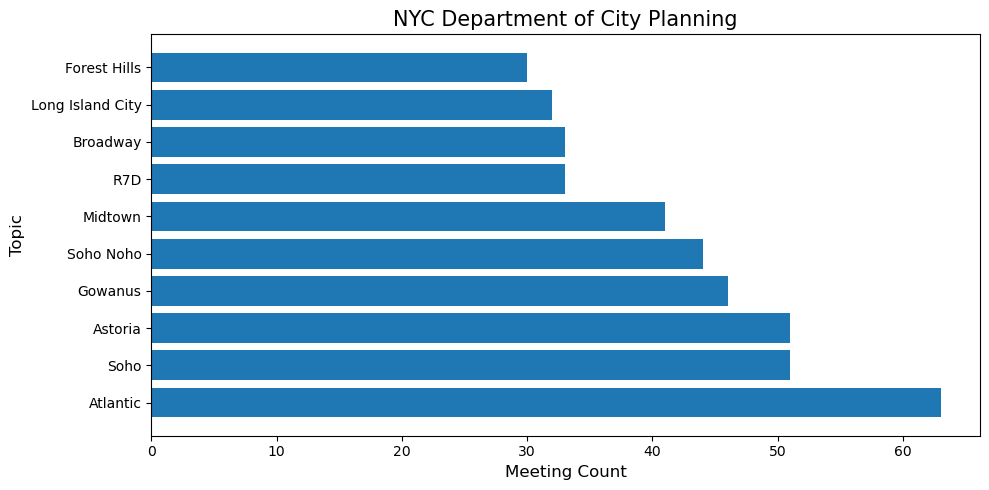

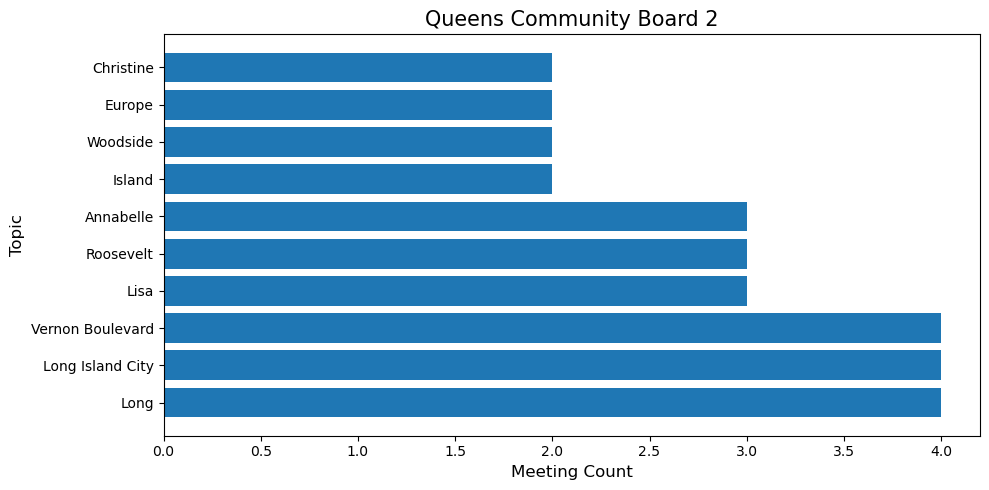

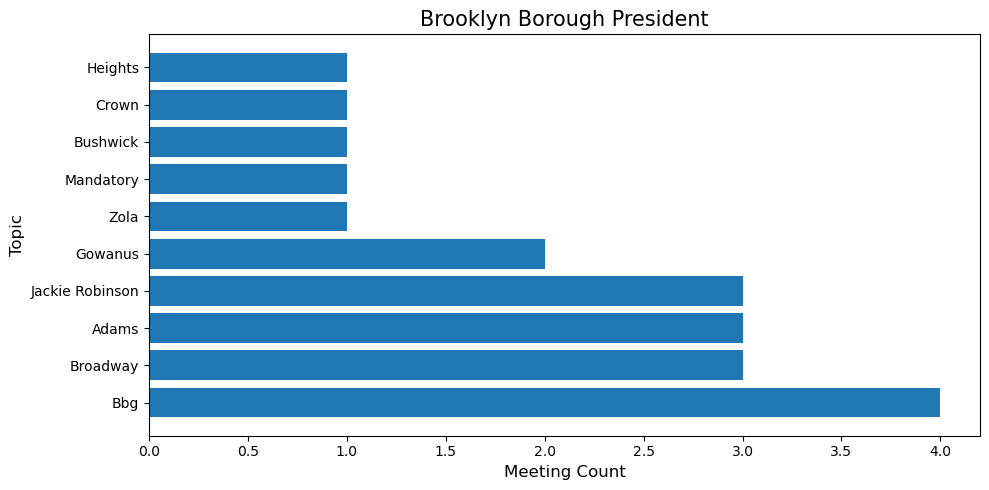

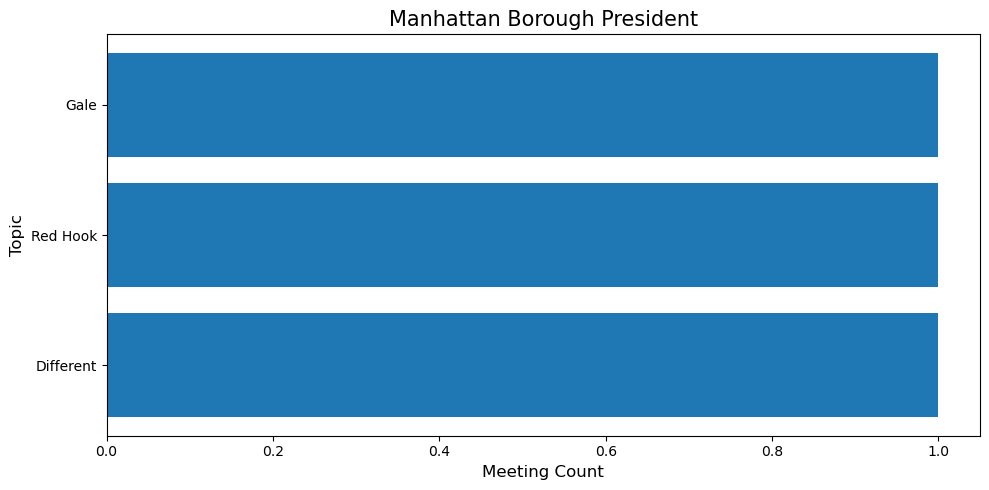

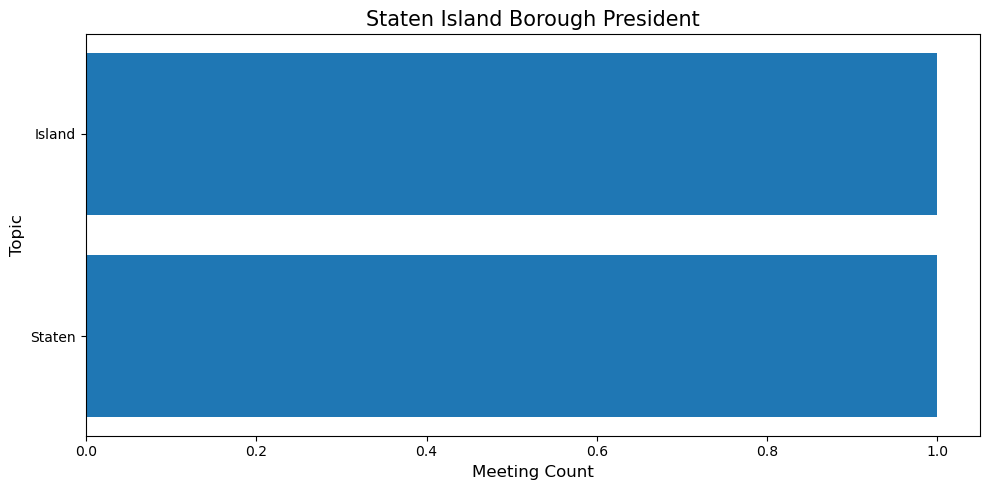

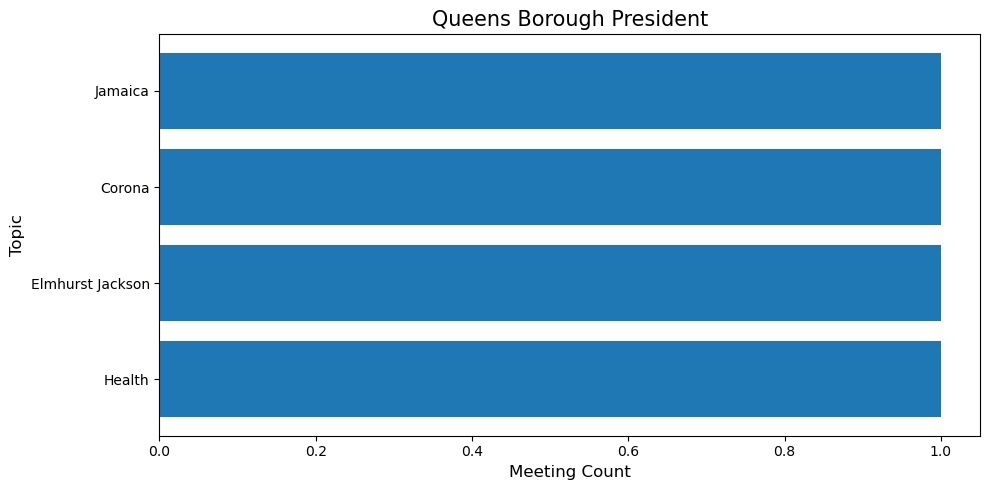

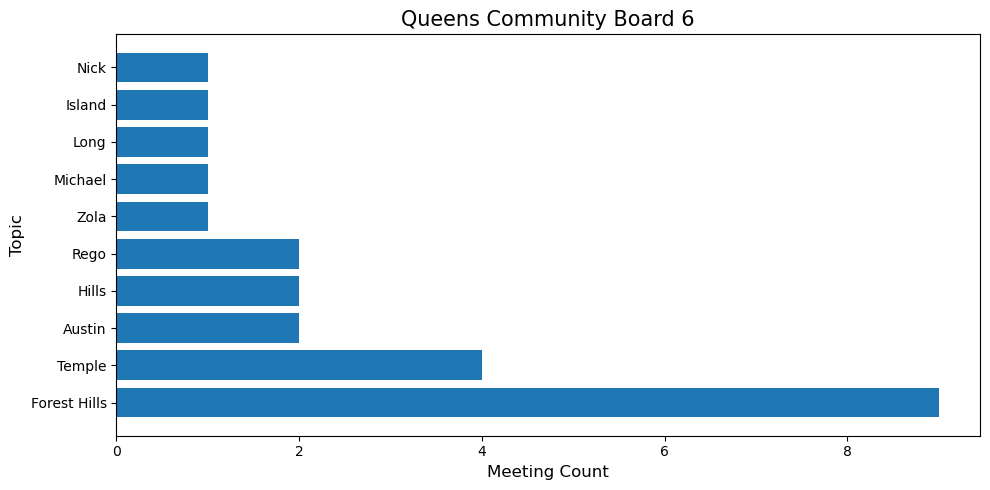

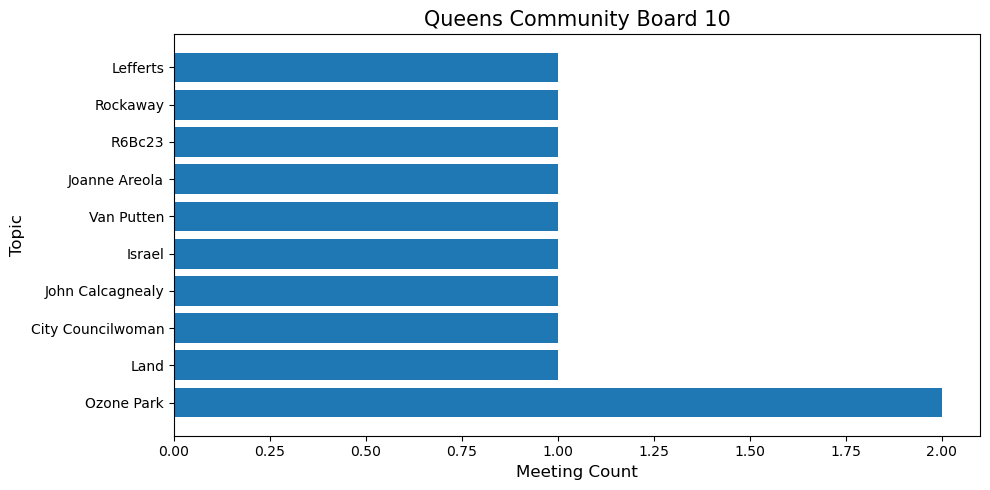

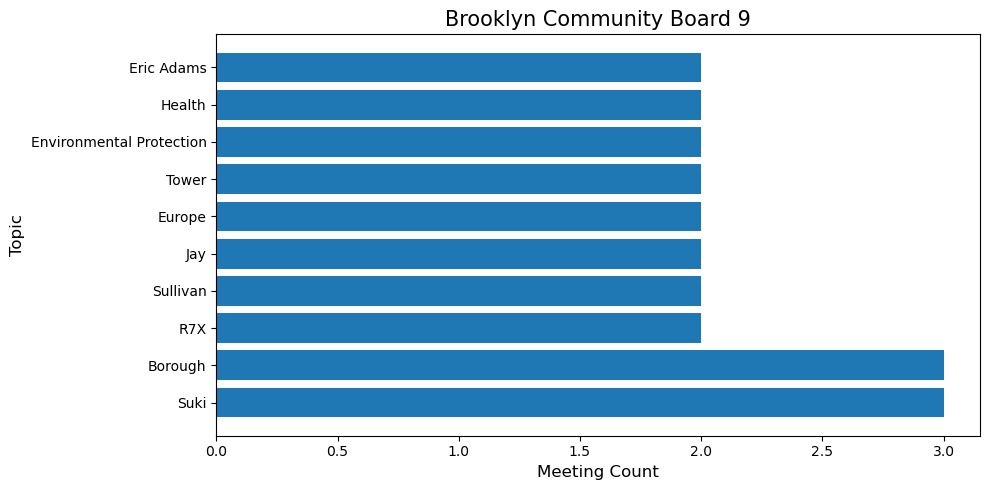

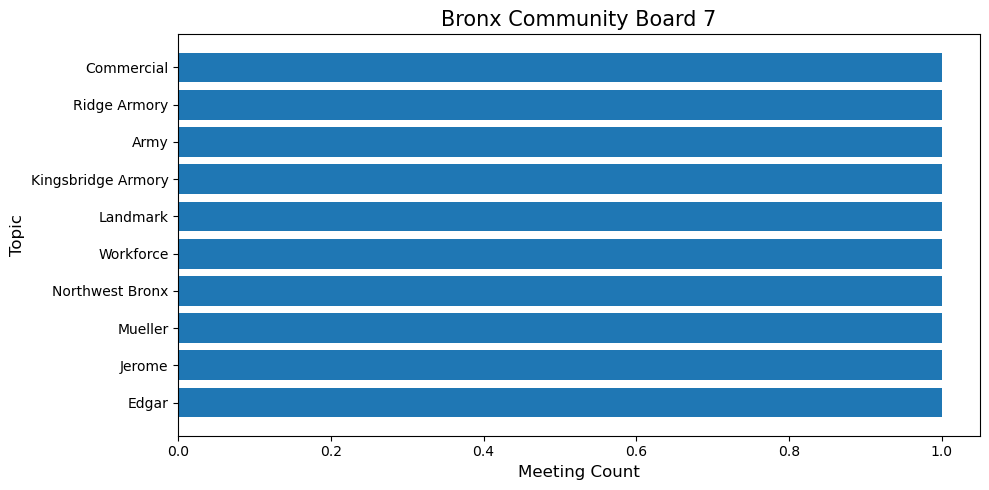

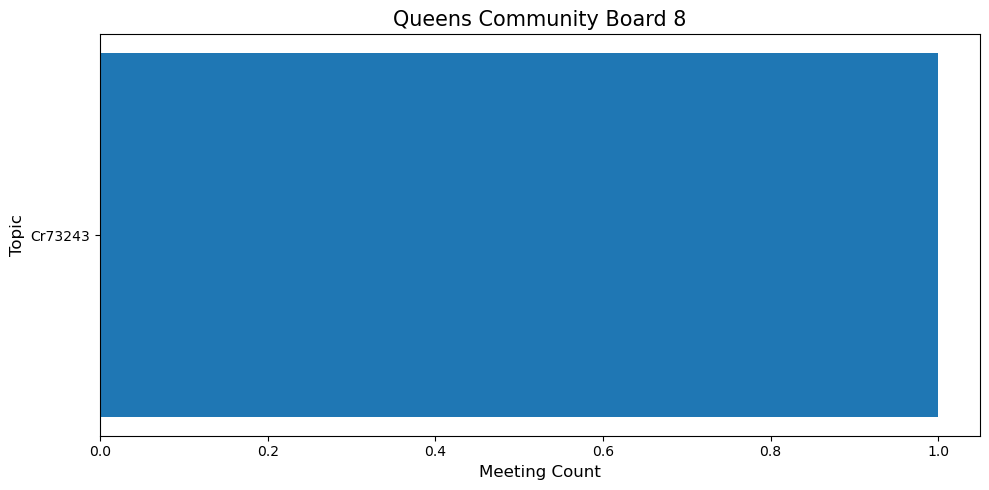

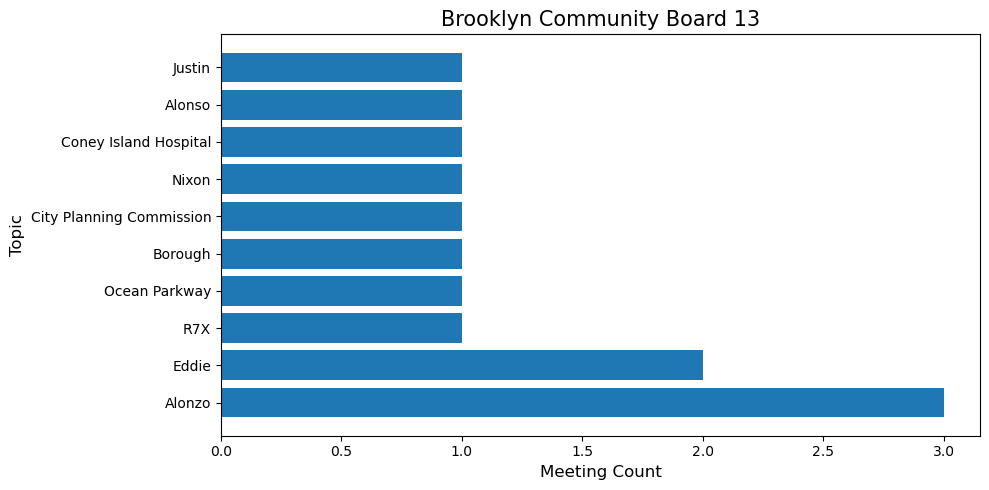

In [554]:
for i in df['normalizedName'].unique():
    cb_ = ops.analyze_by_cb(i, "loc_extract_list", df, remove_value)
    try:
        visualize.plot_counter(n=10, counter_dict=cb_, title=i)
    except ValueError as e:
        print(e)

Removing...
D.O.T
Removing...
NYC
Removing...
D.O.T
Removing...
NYC
Removing...
NYC
Removing...
NYC
Removing...
NYC
Removing...
NYC
Removing...
District
Removing...
NYC
Removing...
D.O.T
Removing...
NYC
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)
Removing...
NYC


/Users/sarah/Documents/repos/block_party/analysis_tools/visualize.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (10,5))


Removing...
NYC
Removing...
NYC
Removing...
D.O.T
Removing...
NYC
not enough values to unpack (expected 2, got 0)
not enough values to unpack (expected 2, got 0)


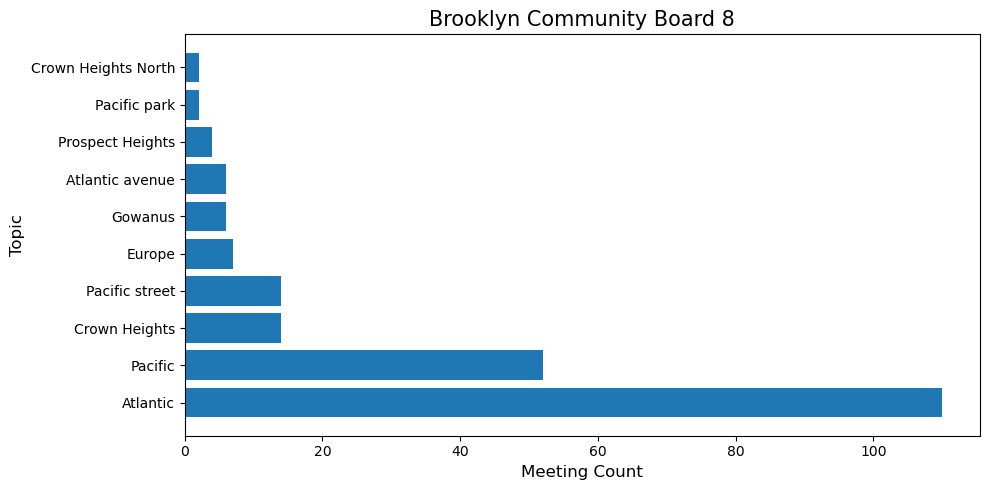

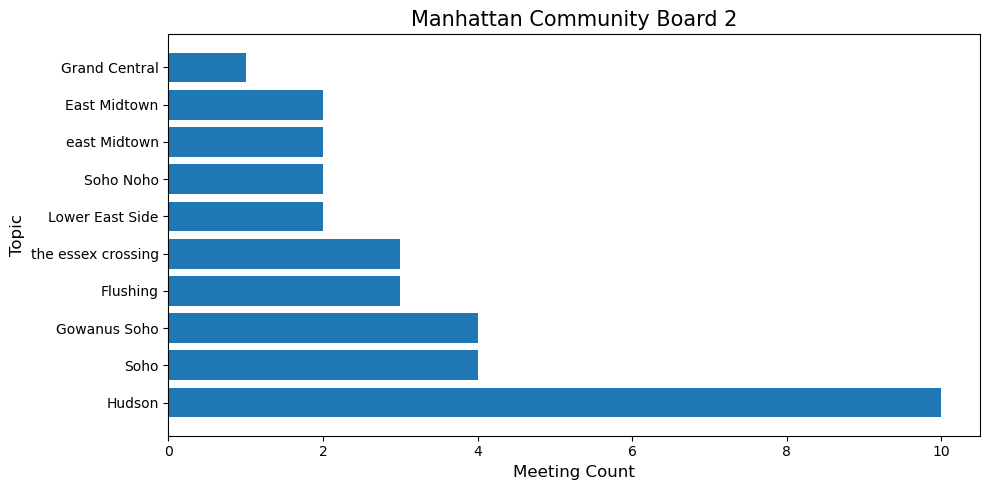

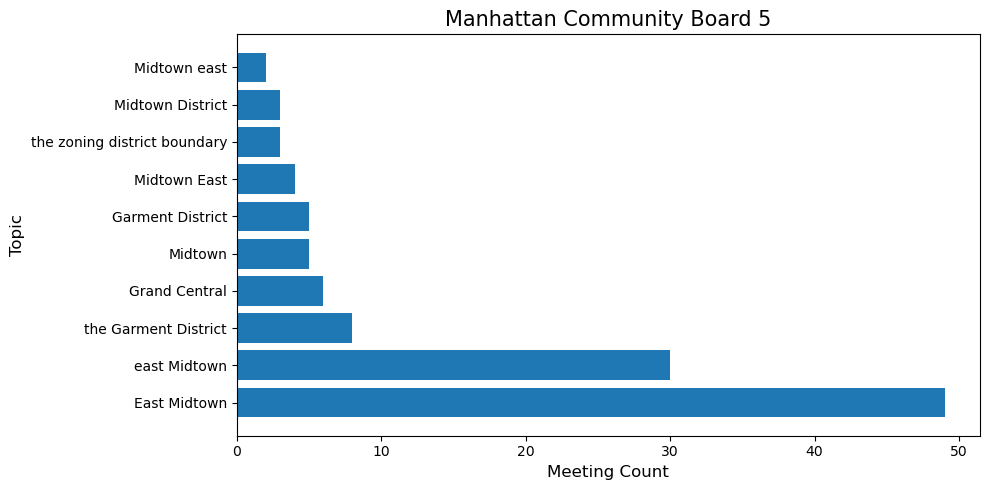

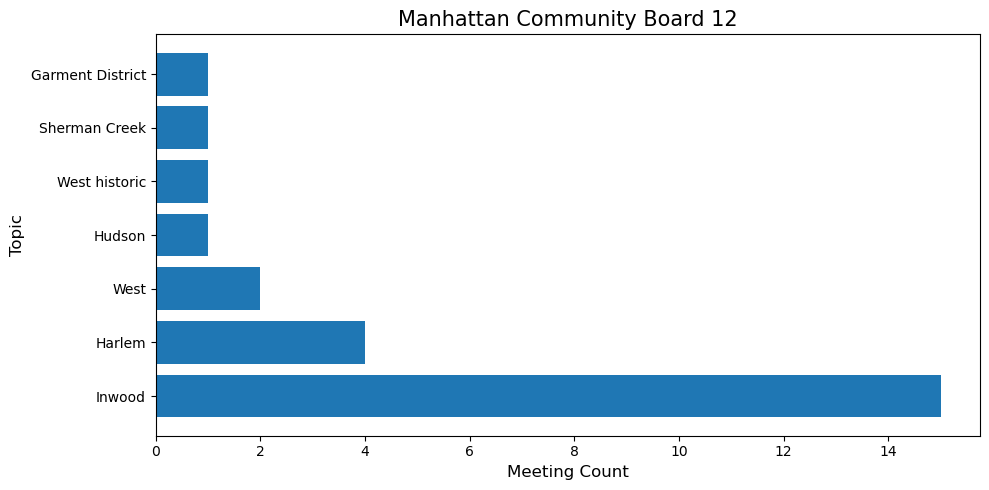

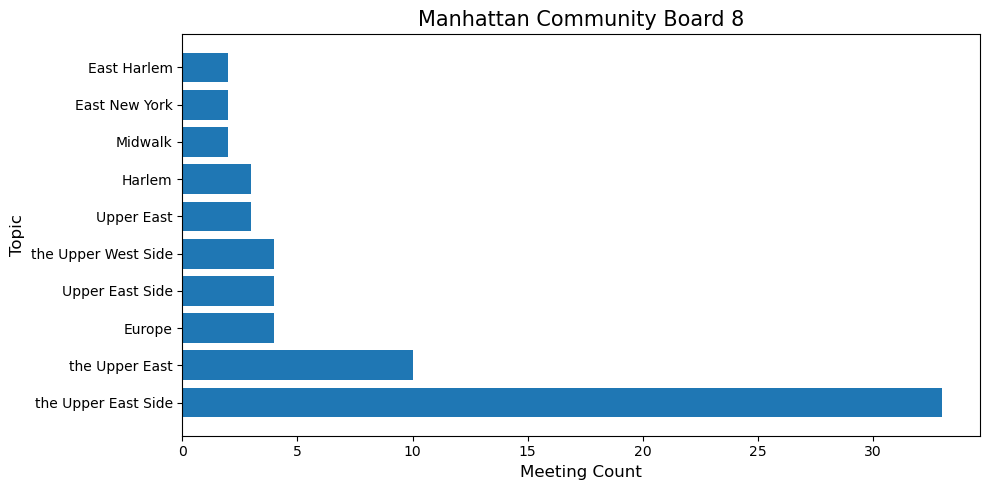

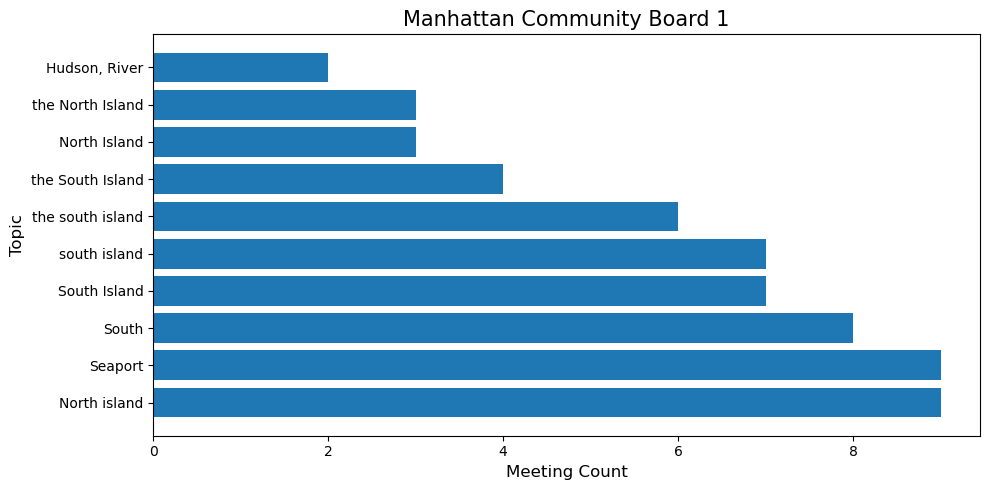

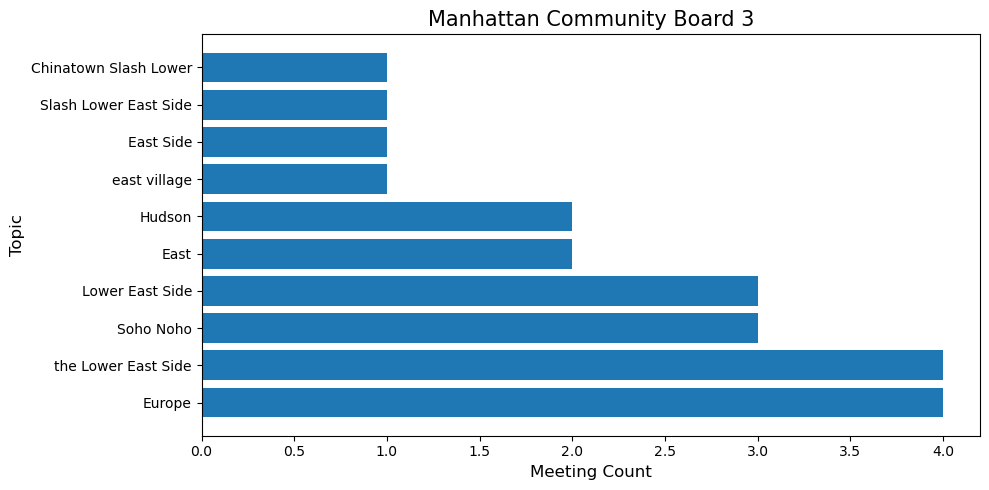

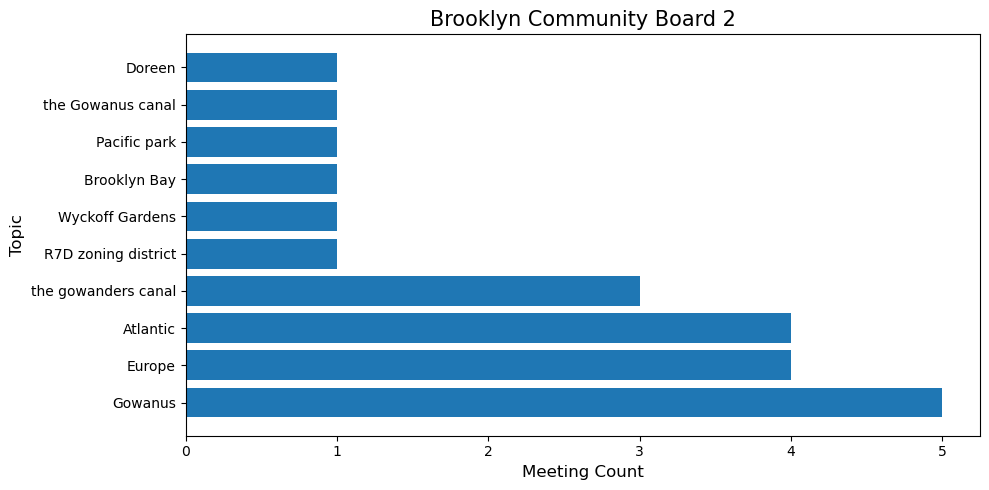

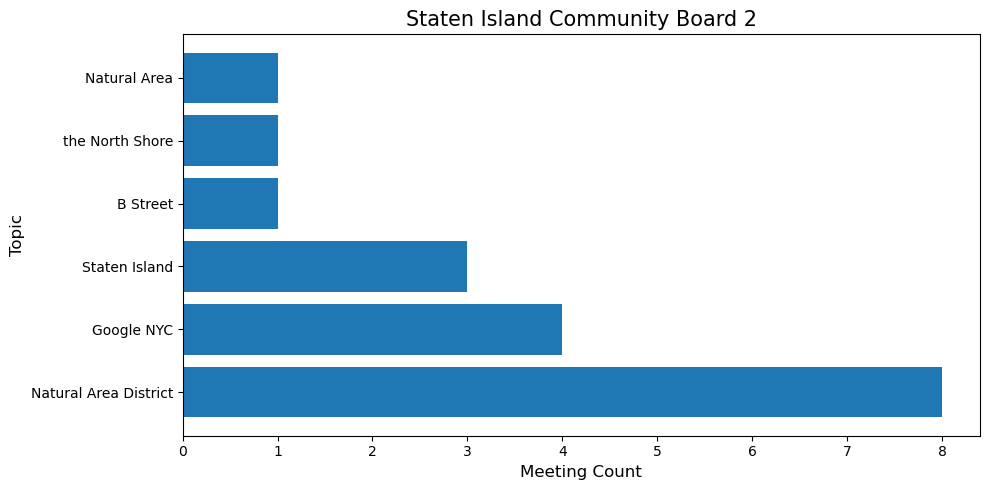

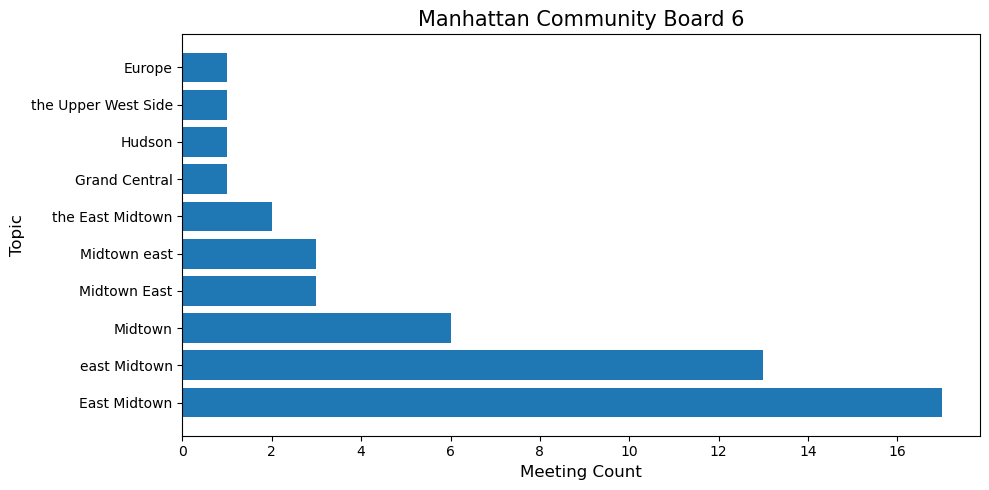

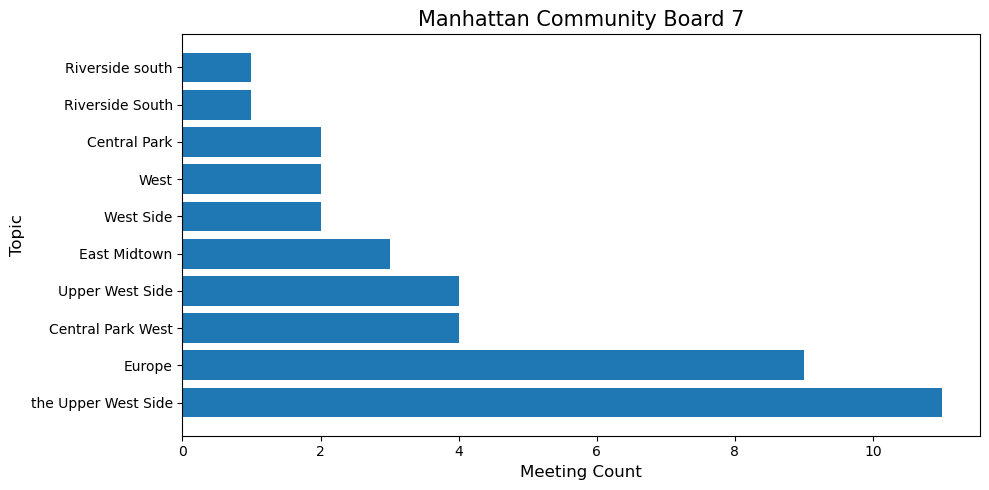

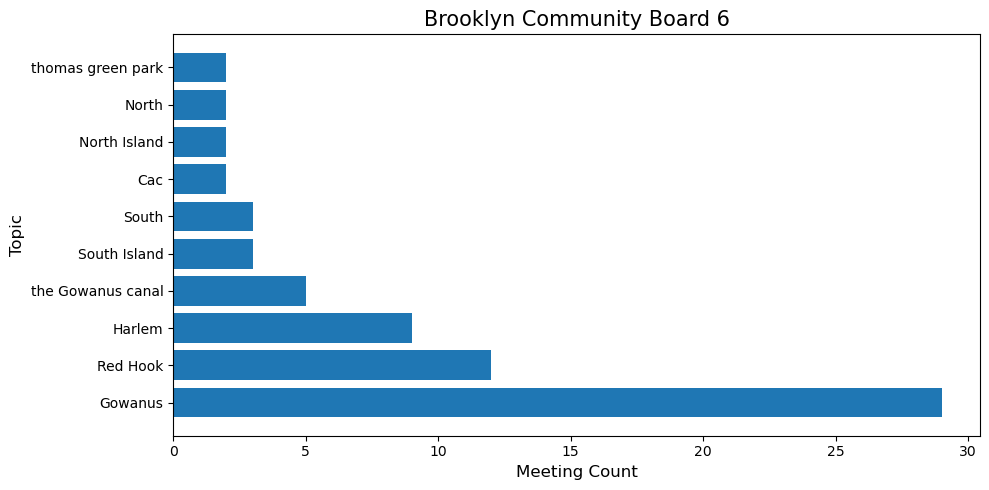

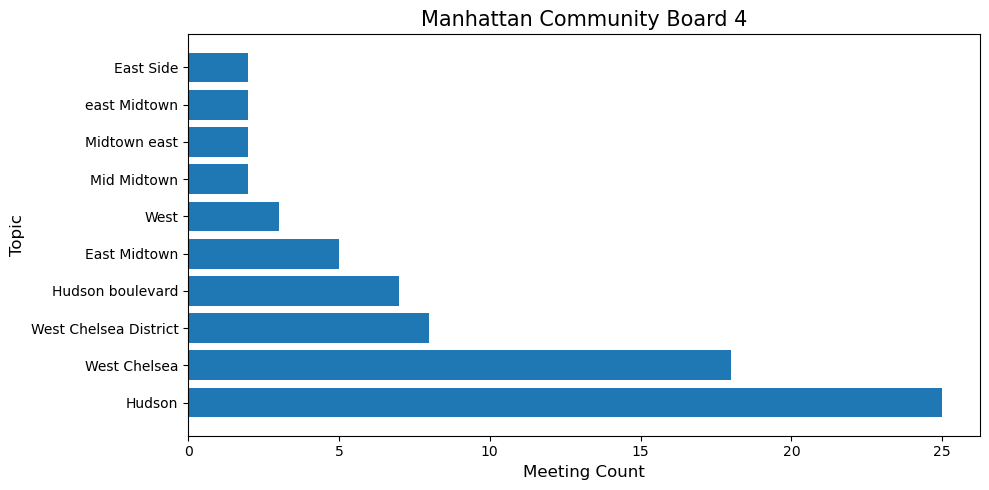

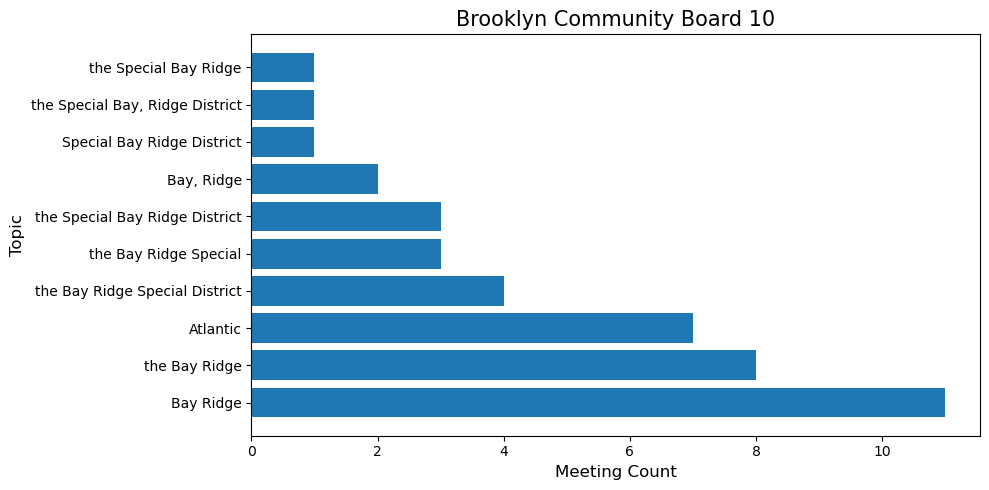

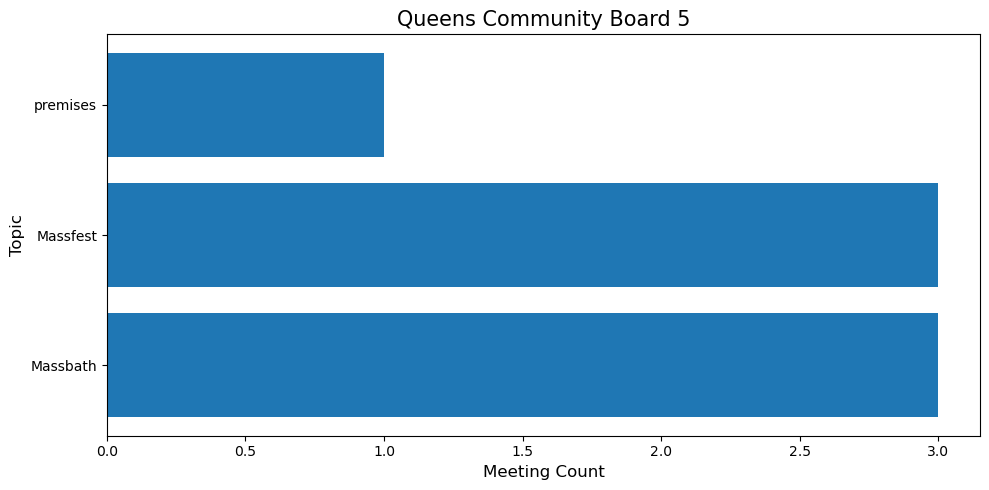

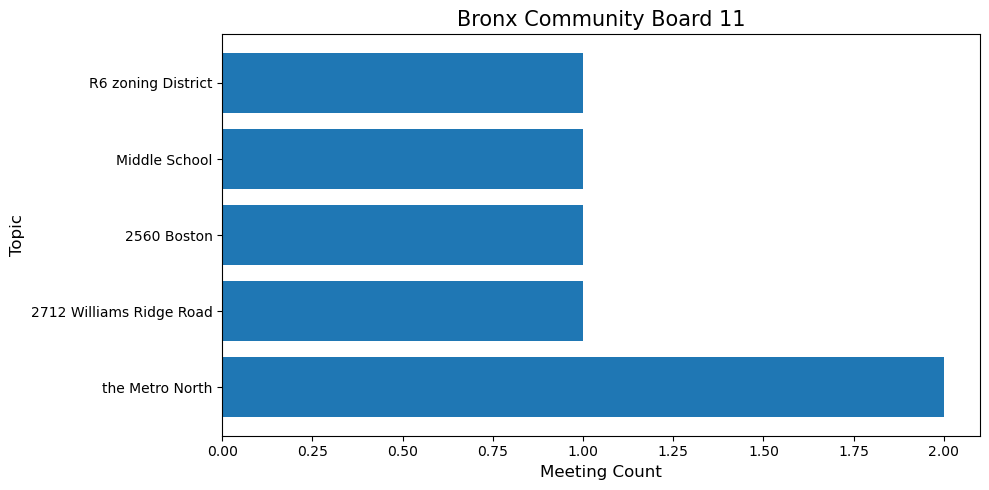

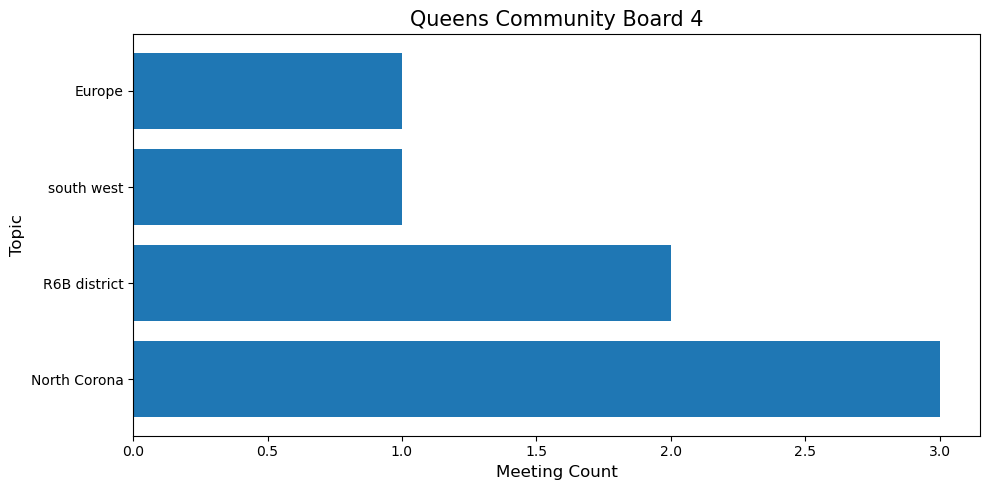

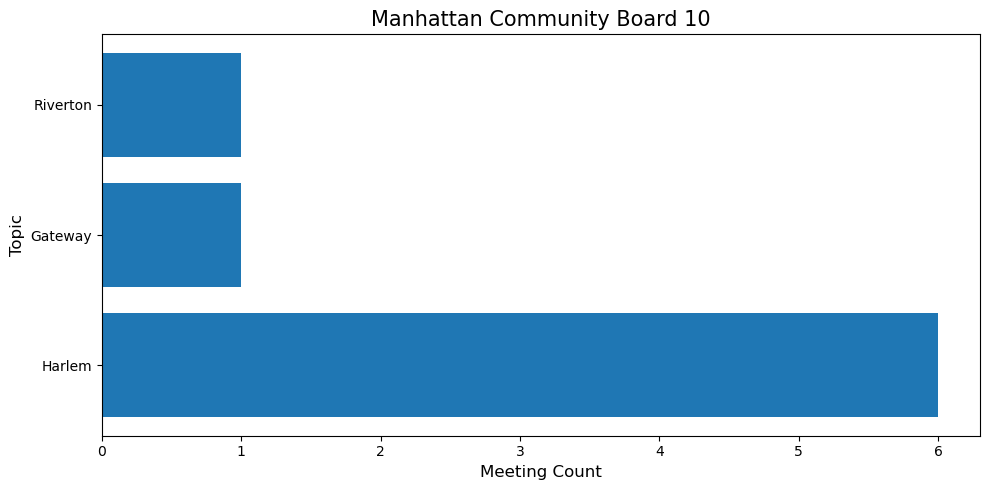

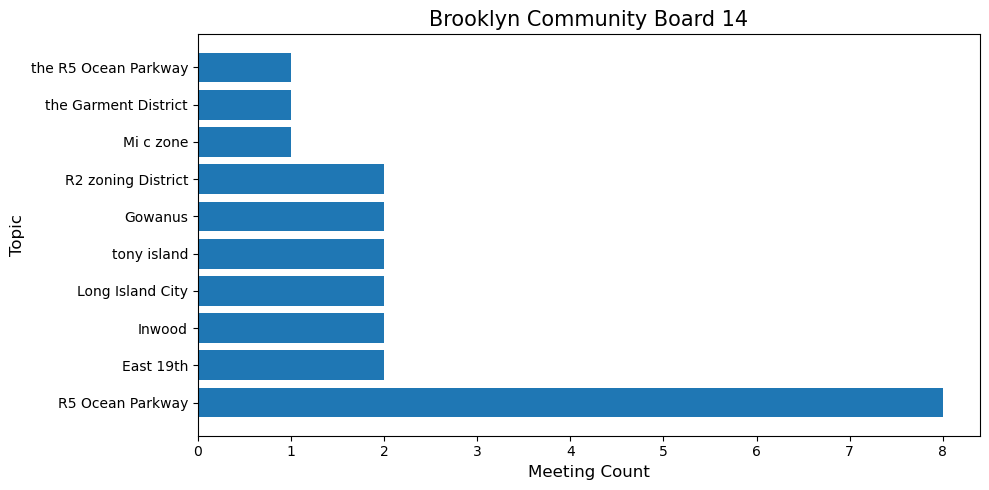

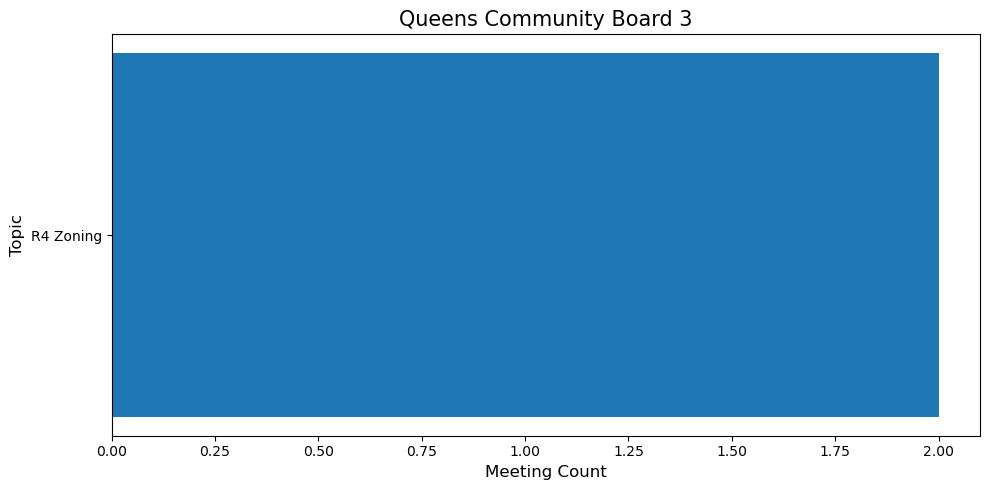

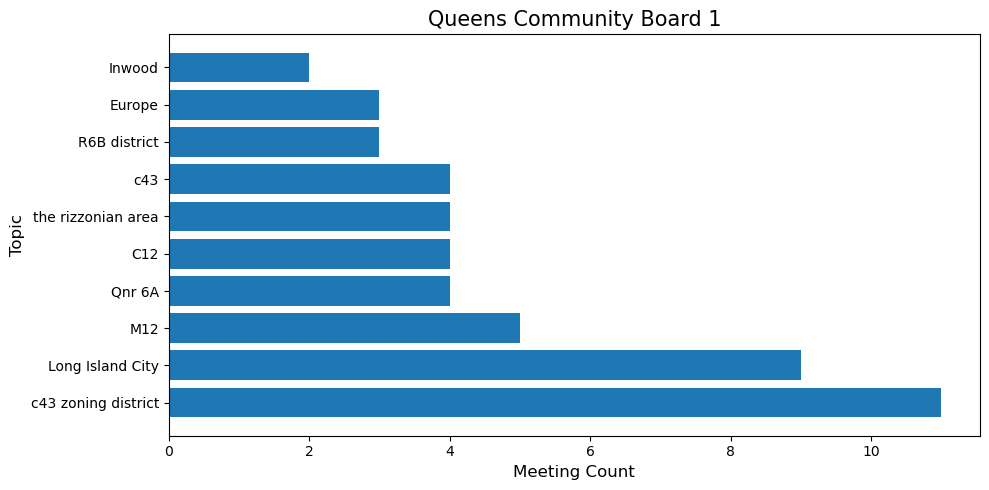

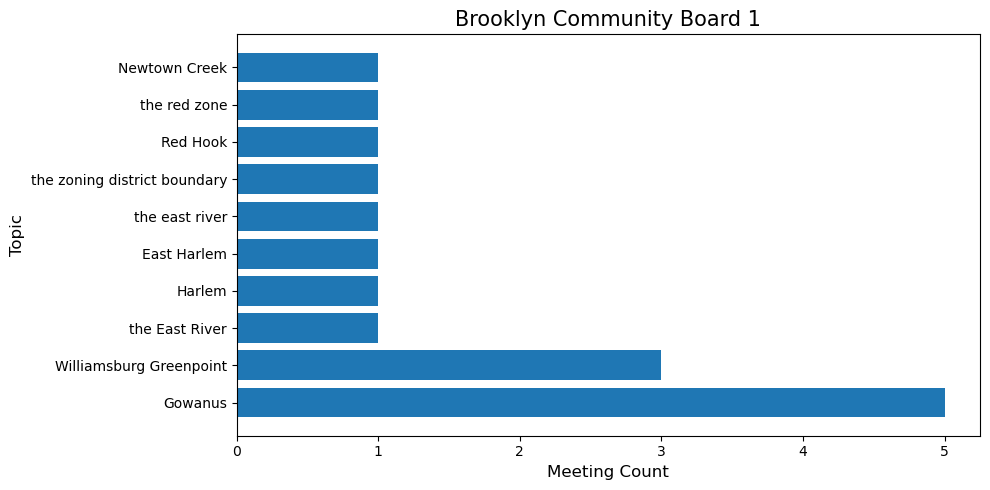

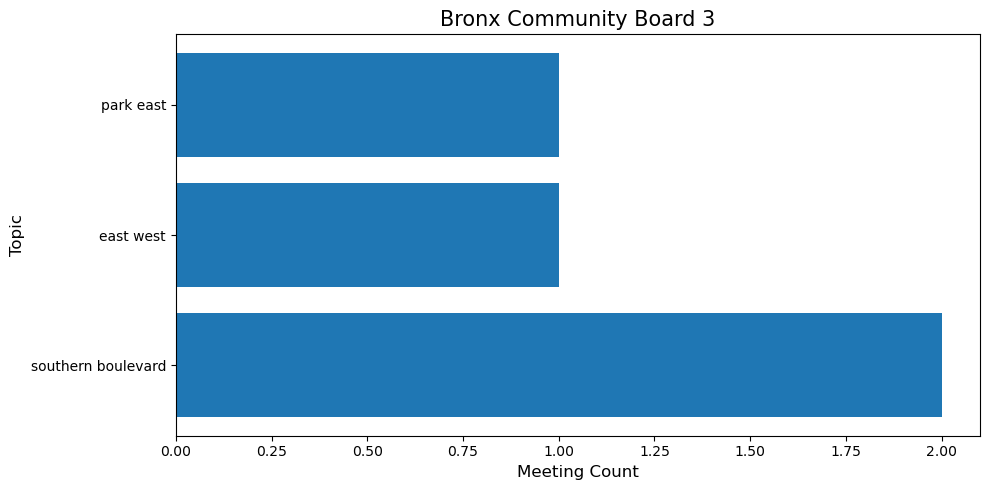

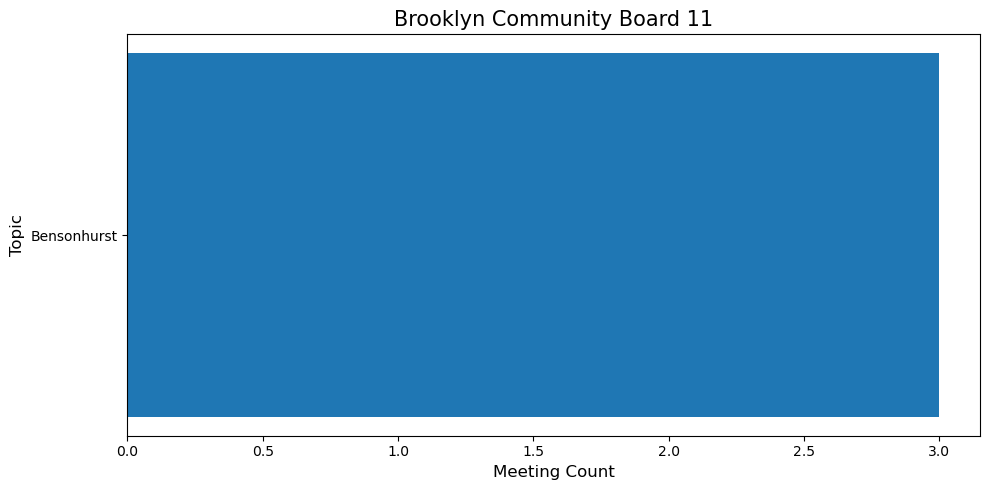

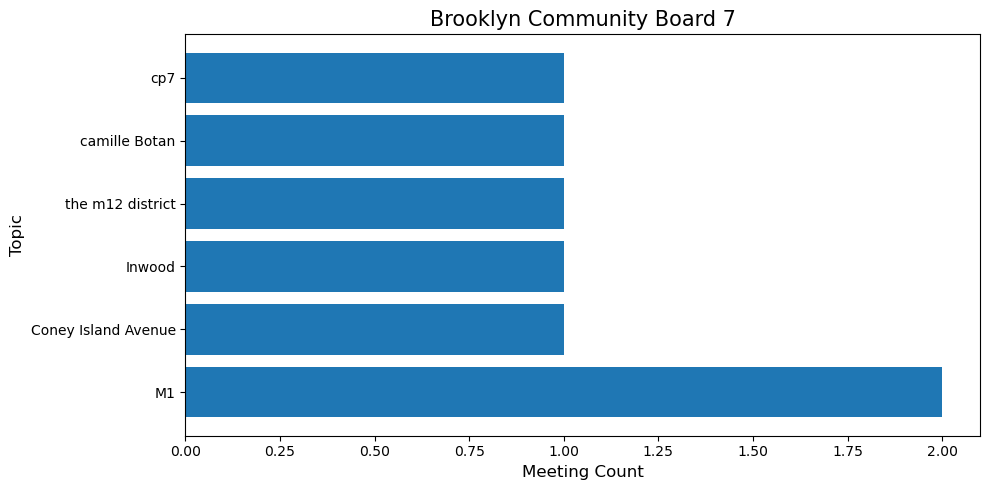

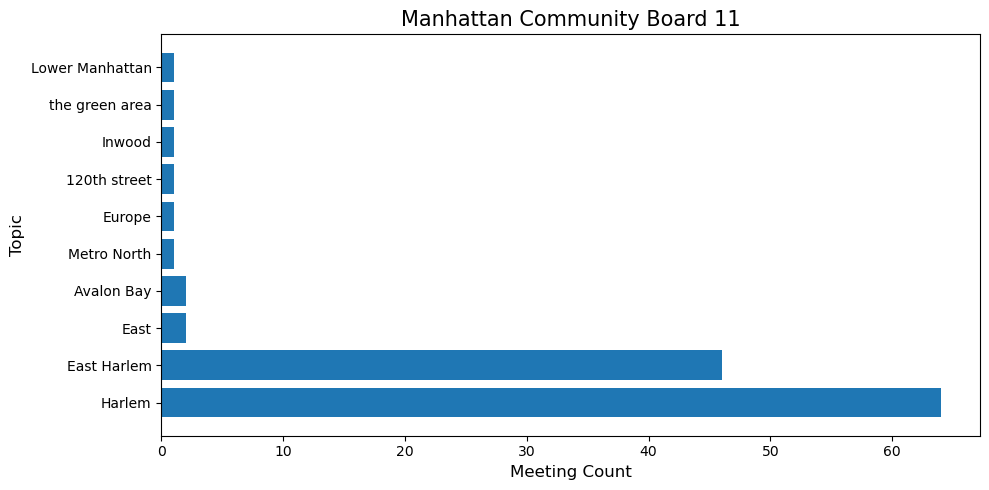

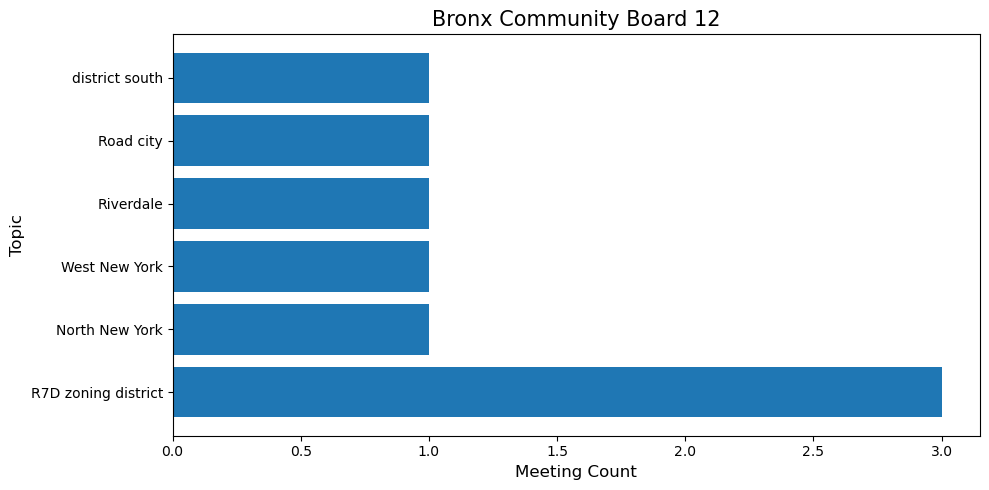

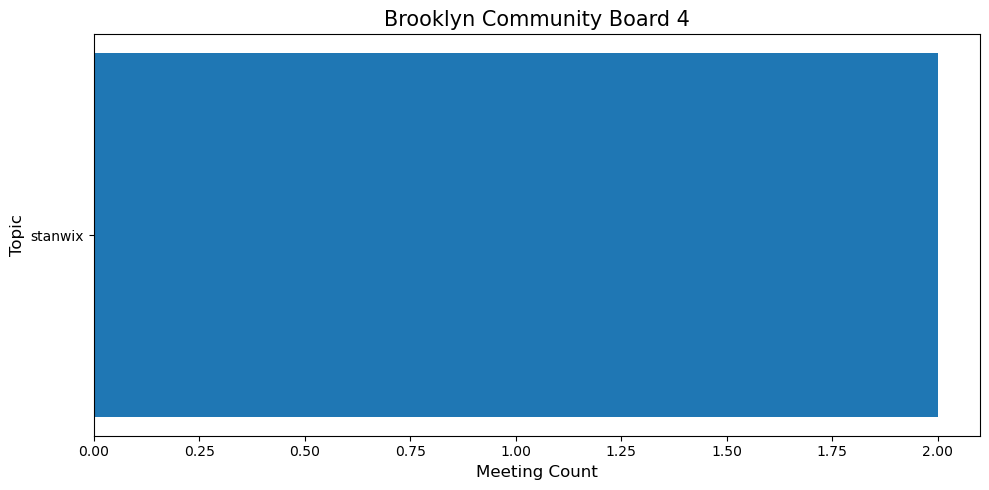

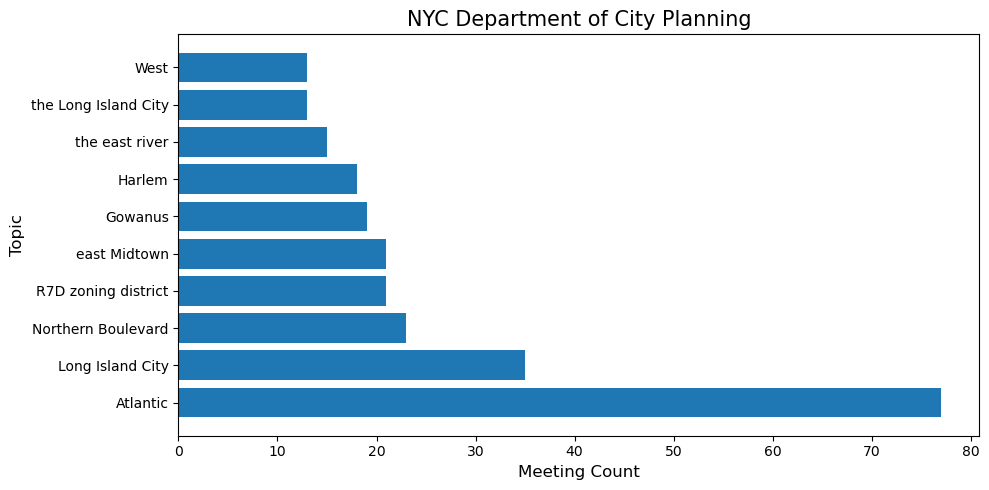

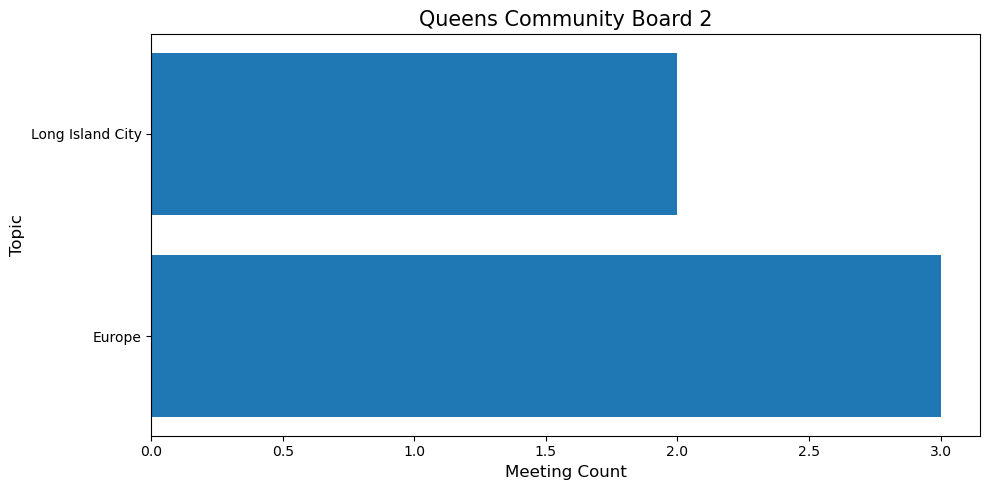

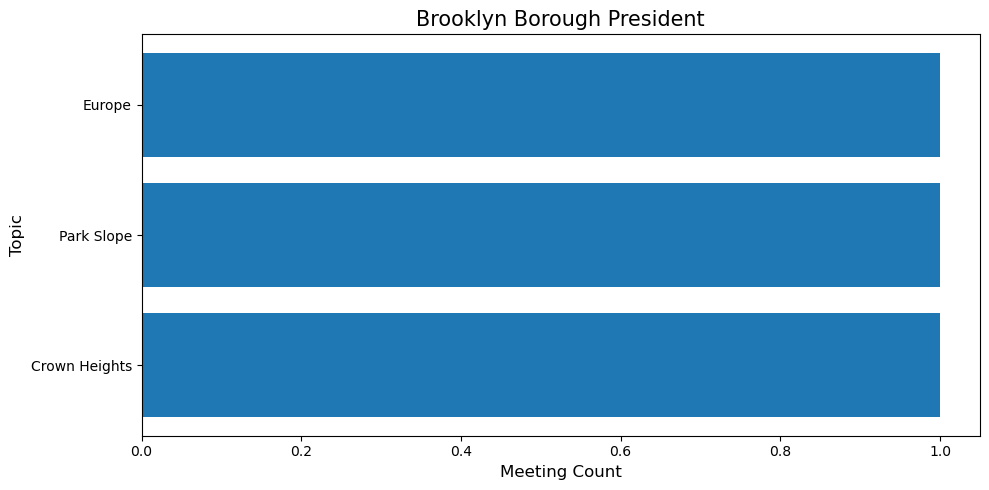

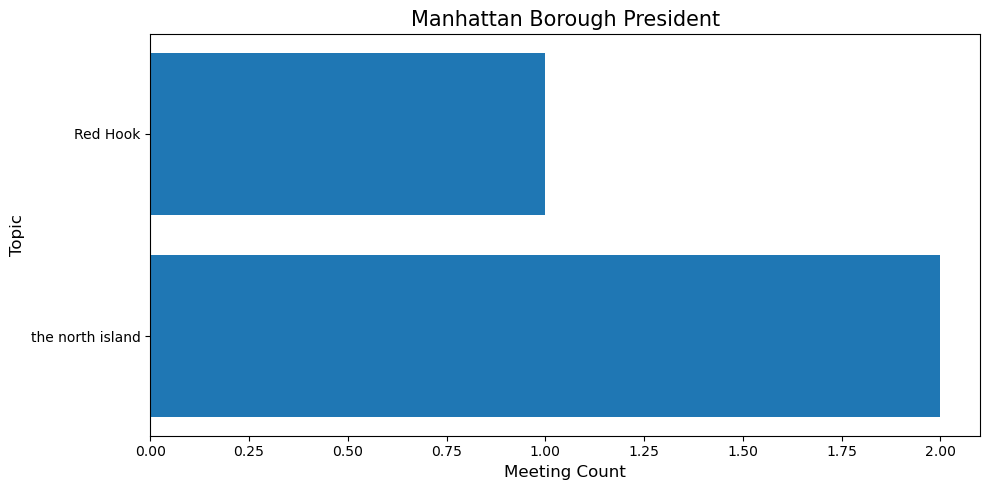

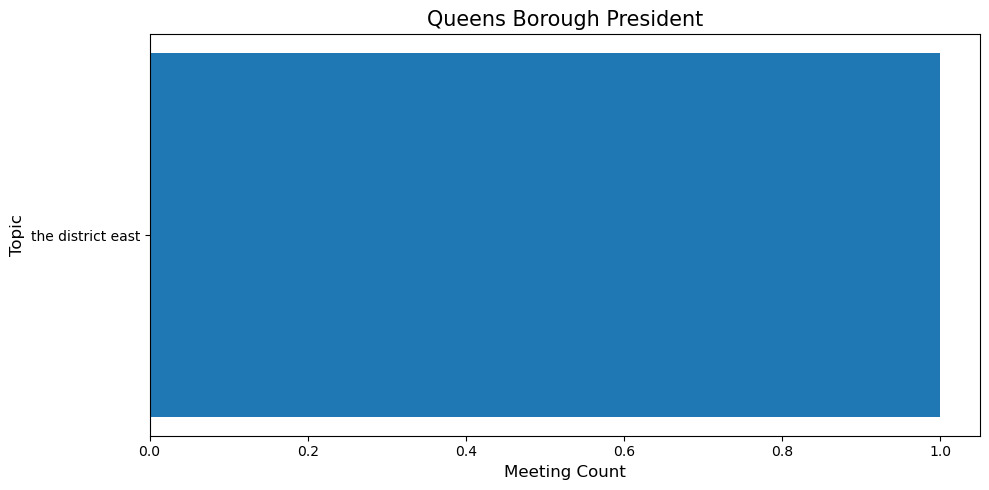

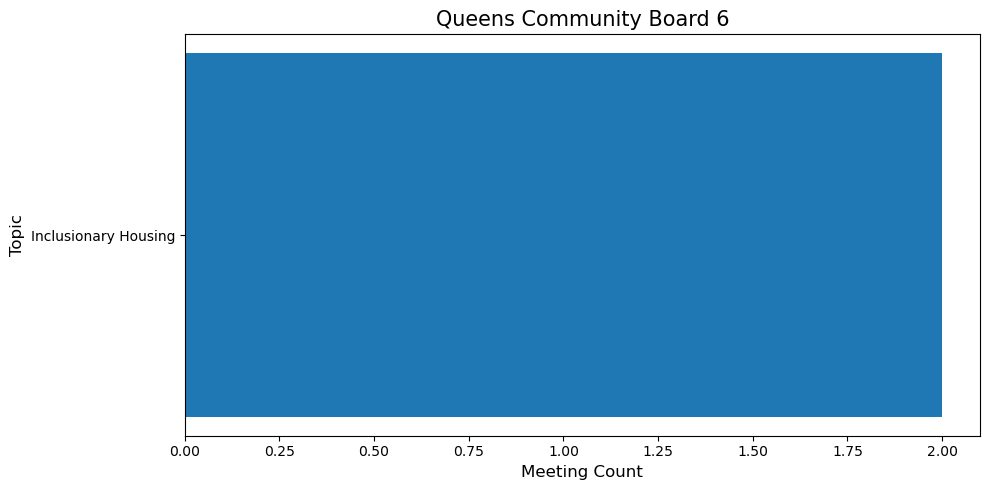

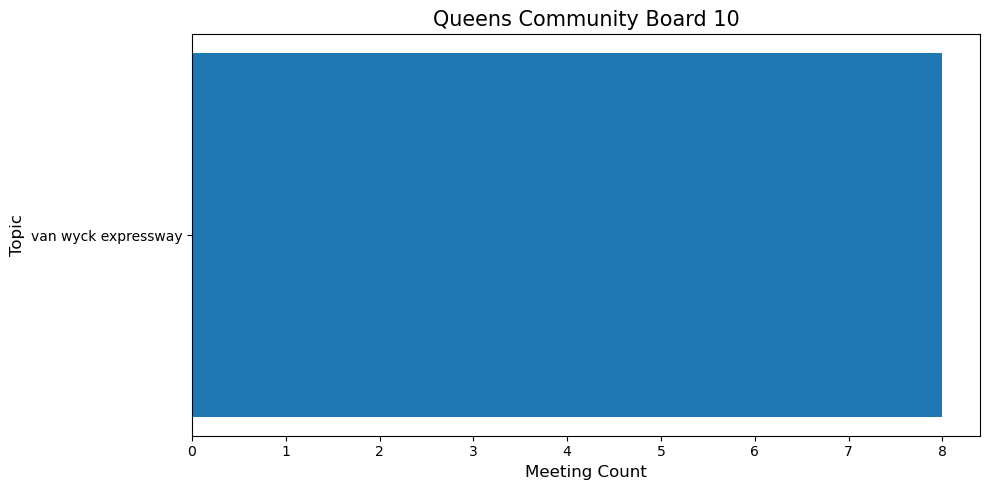

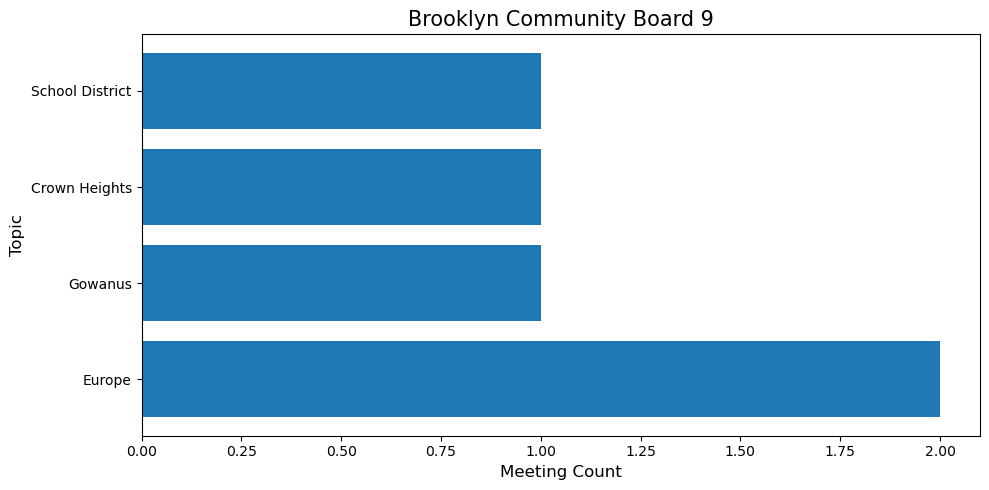

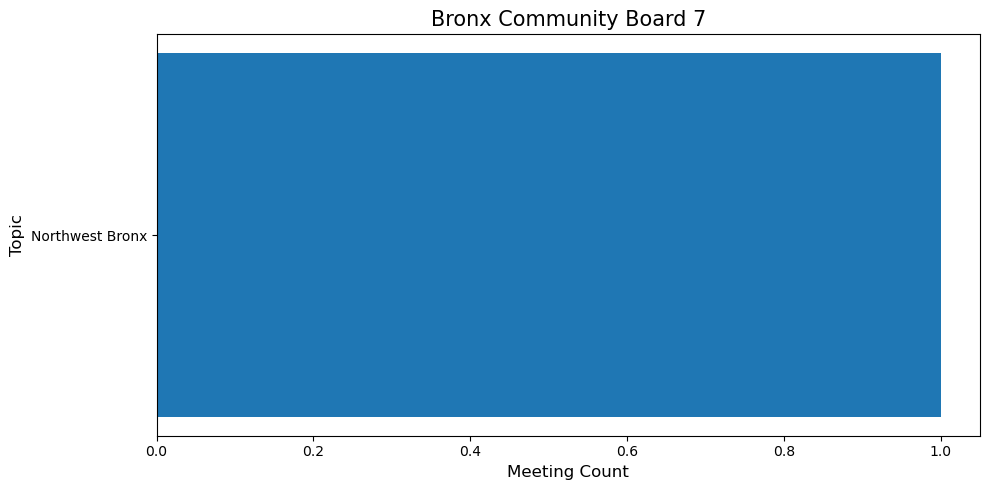

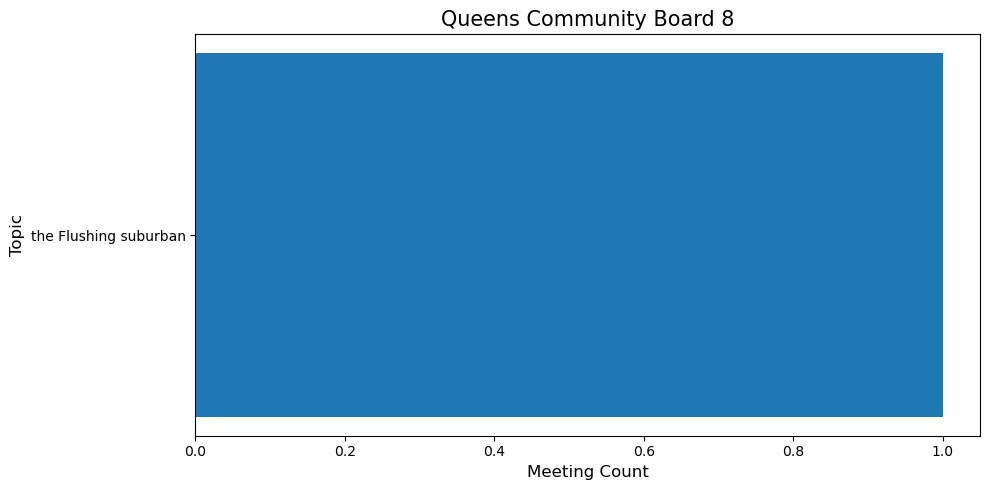

In [545]:
for i in df['normalizedName'].unique():
    cb_ = ops.analyze_by_cb(i, "LOC_list", df, remove_value)
    try:
        visualize.plot_counter(n=10, counter_dict=cb_, title=i)
    except ValueError as e:
        print(e)

## Case Study - Test the Geocoder

In [537]:
cb_4_top = ops.analyze_by_cb("Manhattan Community Board 4", "loc_extract_list", df, remove_value)

Removing...
New York City
Removing...
City
Removing...
Okay
Removing...
City Council
Removing...
New York
Removing...
Manhattan
Removing...
District
Removing...
Department Of City
Removing...
Department
Removing...
Avenue
Removing...
Zoning
Removing...
Mandatory Inclusionary Housing
Removing...
Department Of City Planning
Removing...
Paul
Removing...
FAR
Removing...
Appendix G
Removing...
Street
Removing...
Euler
Removing...
Committee
Removing...
Zoning Committee
Removing...
Basically
Removing...
Sorry
Removing...
WPE
Removing...
DEIS
Removing...
ESD
Removing...
NYU
Removing...
ULURP
Removing...
CBS
Removing...
NYCHA
Removing...
NYC
Removing...
NYPD
Removing...
DOB
Removing...
DOT
Removing...
DCA
Removing...
RFP
Removing...
HPD
Removing...
AMI
Removing...
DHS
Removing...
BSA
Removing...
ADA
Removing...
LPC
Removing...
DEP
Removing...
MTA
Removing...
SLA
Removing...
BLP
Removing...
DCP
Removing...
DSNY
Removing...
CB4
Removing...
DLB
Removing...
MIH
Removing...
EIS
Removing...
DFE
Remov

In [ ]:
locations_to_geo_code = ["Chelsea"]

In [539]:
try_geo_tag = list(dict(cb_4_top.most_common(5)).keys())

In [540]:
try_geo_tag

['Chelsea', 'Clinton', 'Hudson', 'Hudson Yards', 'Midtown']

In [541]:
key_file_path = ops.pass_key('/Users/sarah/Documents/keys/arcgis_key')

TODO:
Test if the above method is more accurate than simply the LOC NERTag extraction.

Geocode to extract latitude and longitude.

In [542]:
dictionary = {}

In [543]:
for i in try_geo_tag:
    # Test the function
    location_name = f"{i}, Manhattan, NY"
    lat, lon = geotag.get_lat_lon(location_name, key_file_path[0])
    print(f"{location_name}:{lat},{lon}")

Chelsea, Manhattan, NY:40.74610000000007,-74.00044999999994
Clinton, Manhattan, NY:40.76449000000008,-73.98819999999995
Hudson, Manhattan, NY:40.7234050173887,-74.00616001058657
Hudson Yards, Manhattan, NY:40.75431000000003,-74.00118999999995
Midtown, Manhattan, NY:40.75909000000007,-73.97668999999996


For each CB, can filter to cherry pick the top locations that get filtered...then geocode.